# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 3. Робастная статистика. Доверительное оценивание.
### Дедлайн --- 10 ноября 23:59

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [55]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import beta, cauchy, norm, poisson
import pandas as pd
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mean', 'multivariate_normal', 'poisson', 'sample', 'norm', 'beta', 'maximum']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


*Условие задания*: Великая ордалия продолжает свой путь на север, однако адепты доселе неизвестной магии - Текне используют своё искусство, чтобы вмешаться в отлаженную работу имперских статистических оценок параметров, меняя им часть данных. Теперь необходимо давать такие оценки, которые выдержат фокусы волшебников консульта, чтобы Ордалия смогла дойти до Голготтерата!

Судьба многомилионной армии теперь в Ваших руках!

## Задача 1

Эта задача посвящена *робастному* оцениванию. Это такой раздел статистики, который изучает, как сильно оценки зависят от выбросов и других *неверных* данных и как построить оценки, которые выдерживают шумы.

0) Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения, то рисуйте его синим цветом.

In [56]:
color_for_normal, color_for_laplace, color_for_cauchy = sns.color_palette("colorblind")[:3]
colors = [color_for_normal, color_for_laplace, color_for_cauchy]
N = 500

np.random.seed(42)  #как всегда

sample_normal = np.random.normal(loc=0, scale=1, size=N)
sample_laplace = np.random.laplace(loc=0, scale=1/np.sqrt(2), size=N)
sample_cauchy = np.random.standard_cauchy(size=N)

1) Постройте график плотности распределения для всех трех распределений на одних осях.

In [57]:
plt.figure(figsize=(10, 6))

sns.kdeplot(sample_normal, color=color_for_normal, label='Нормальное')
sns.kdeplot(sample_laplace, color=color_for_laplace, label='Лаплас')
sns.kdeplot(sample_cauchy, color=color_for_cauchy, label='Коши')

plt.xlim([-10, 10])

plt.title('Плотность распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()

видно, что распределение коши слишком приплюснуто относительно остальных распределений. связано это с тем, что у него нет конечного матожижания и оно имеет тяжёлые хвосты (это мы уже обсуждали в предыдущих домашках)

2) Мы будем оценивать параметр сдвига каждого из распределений. Сделайте предположение о том, для каких распределений параметр сдвига будет оценён точнее при помощи среднего и медианы. Докажите Ваши предположения теоретически и экспериментально. Моделировать оценки в этот раз не нужно, достаточно по одной выборке произвести оценивание и проверить его точность.

**Ответ:** с нормальным всё должно быть хорошо. потому что там определены матожидания всех порядков, а распр. Лапласа и Коши имеют тяжёлые хвосты. таким образом, для нормального распределения лучше подойдет в качестве оценки подойдет среднее, а для остальных двух - медиана, ведь она менее чувствительна к всяким выбросам из распределения. Но вообще плотность нормального распределения симметрична, поэтому и оценка через медиану не будет плохой

In [58]:
mean_normal = np.mean(sample_normal)
median_normal = np.median(sample_normal)

mean_laplace = np.mean(sample_laplace)
median_laplace = np.median(sample_laplace)

mean_cauchy = np.mean(sample_cauchy)
median_cauchy = np.median(sample_cauchy)

print("Нормальное распределение: Среднее =", mean_normal, "Медиана =", median_normal)
print("Распределение Лапласа: Среднее =", mean_laplace, "Медиана =", median_laplace)
print("Распределение Коши: Среднее =", mean_cauchy, "Медиана =", median_cauchy)

Нормальное распределение: Среднее = 0.006837994588647575 Медиана = 0.01279714632985094
Распределение Лапласа: Среднее = 0.01658811377120249 Медиана = 0.006117497324749223
Распределение Коши: Среднее = 0.5794923133601473 Медиана = -0.00963014544427188


да, так и оказалось: у нормального лучшие результаты показало среднее, а у двух остальных распределений медиана. и да, у нормального медиана тоже очень близка к нулю, как и ожидалось

3) Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики. Реализуйте усечённое среднее для одной выборки, но разных $\alpha$. На одних осях постройте распределение оценки для разных $\alpha$. Как оно изменяется?

In [59]:
def truncated_mean(sample, alpha=0.3):
    n = len(sample)
    k = int(np.floor(alpha * n))
    sorted_sample = np.sort(sample)
    truncated_sample = sorted_sample[k:n - k]
    return np.mean(truncated_sample)

In [60]:
alphas = np.linspace(0, 0.49, 50)

mean_truncated_normal = [truncated_mean(sample_normal, alpha=a) for a in alphas]
mean_truncated_laplace = [truncated_mean(sample_laplace, alpha=a) for a in alphas]
mean_truncated_cauchy = [truncated_mean(sample_cauchy, alpha=a) for a in alphas]

plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_truncated_normal, color=color_for_normal, label='Нормальное')
plt.plot(alphas, mean_truncated_laplace, color=color_for_laplace, label='Лапласа')
plt.plot(alphas, mean_truncated_cauchy, color=color_for_cauchy, label='Коши')
plt.xlabel('α')
plt.ylabel('Усеченное среднее')
plt.title('Усеченное среднее в зависимости от α')
plt.legend()
plt.show()

4) Постройте график квадрата разности каждой из оценок и истинного значения параметра в зависимости от роста размера выборки для разных $\alpha$. Сделайте выводы, какие оценки точнее.

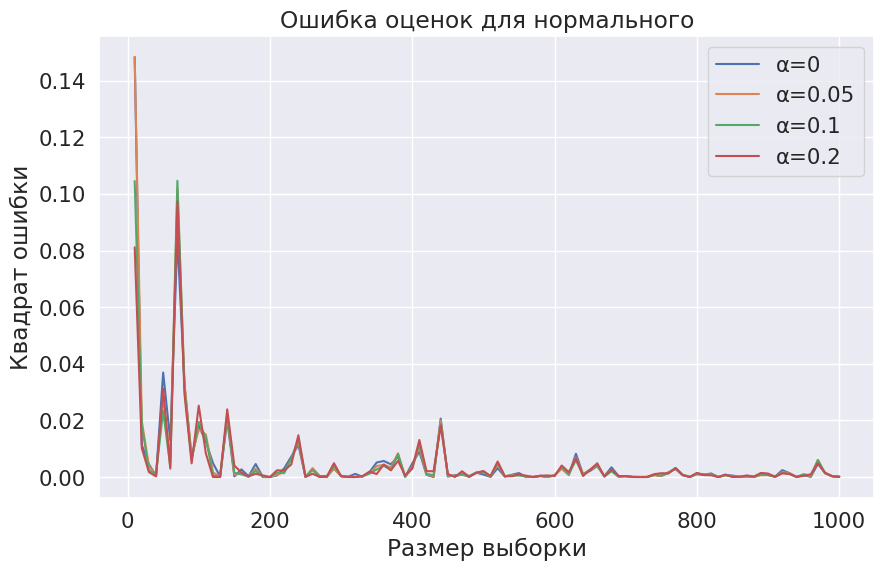

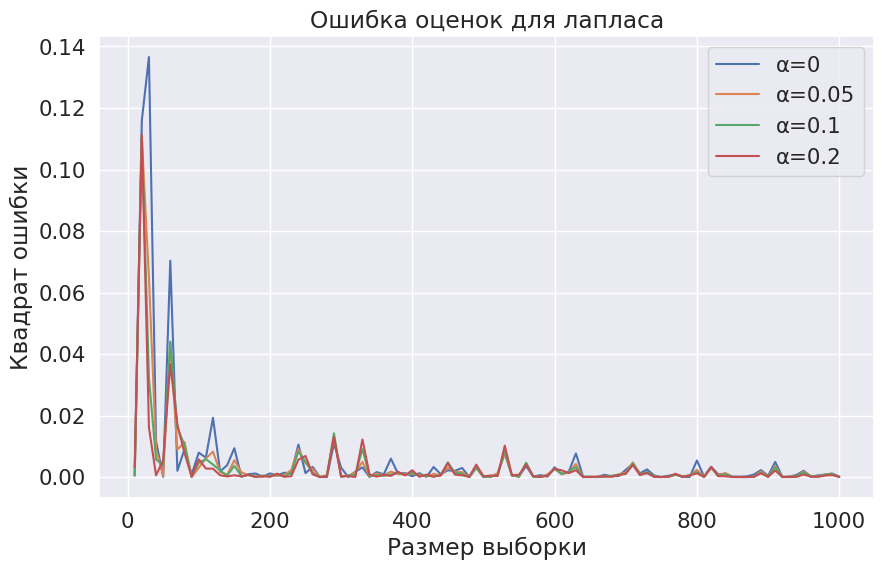

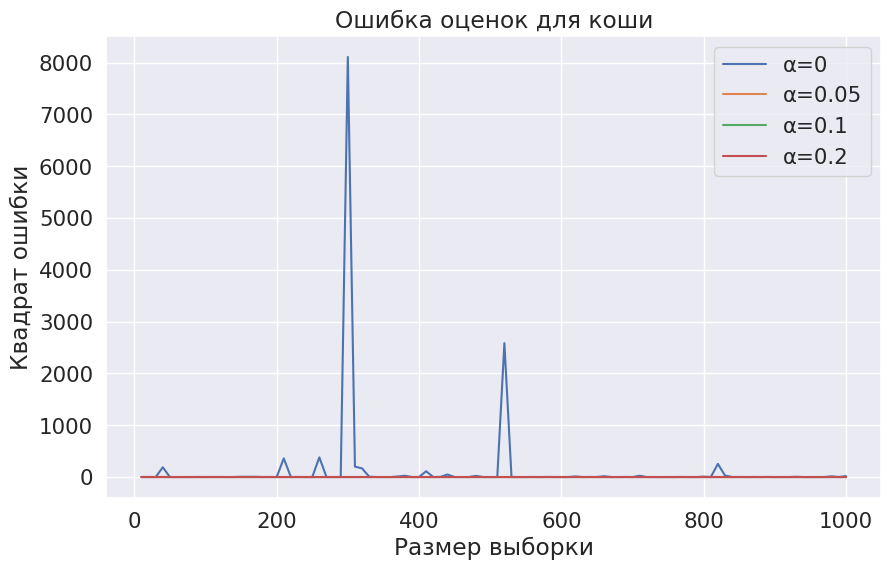

In [61]:
sample_sizes = np.arange(10, 1001, 10)
alphas = [0, 0.05, 0.1, 0.2]

errors_normal = {a: [] for a in alphas}
errors_laplace = {a: [] for a in alphas}
errors_cauchy = {a: [] for a in alphas}

for n in sample_sizes:
    s_normal = np.random.normal(0, 1, n)
    s_laplace = np.random.laplace(0, 1/np.sqrt(2), n)
    s_cauchy = np.random.standard_cauchy(n)
    for a in alphas:
        tm_normal = truncated_mean(s_normal, alpha=a)
        tm_laplace = truncated_mean(s_laplace, alpha=a)
        tm_cauchy = truncated_mean(s_cauchy, alpha=a)
        errors_normal[a].append((tm_normal - 0) ** 2)
        errors_laplace[a].append((tm_laplace - 0) ** 2)
        errors_cauchy[a].append((tm_cauchy - 0) ** 2)

# график для нормльаного:
plt.figure(figsize=(10, 6))
for a in alphas:
    plt.plot(sample_sizes, errors_normal[a], label=f'α={a}')
plt.xlabel('Размер выборки')
plt.ylabel('Квадрат ошибки')
plt.title('Ошибка оценок для нормального')
plt.legend()
plt.show()

# график для лапласа:
plt.figure(figsize=(10, 6))
for a in alphas:
    plt.plot(sample_sizes, errors_laplace[a], label=f'α={a}')
plt.xlabel('Размер выборки')
plt.ylabel('Квадрат ошибки')
plt.title('Ошибка оценок для лапласа')
plt.legend()
plt.show()


# график для коши:
plt.figure(figsize=(10, 6))
for a in alphas:
    plt.plot(sample_sizes, errors_cauchy[a], label=f'α={a}')
plt.xlabel('Размер выборки')
plt.ylabel('Квадрат ошибки')
plt.title('Ошибка оценок для коши')
plt.legend()
plt.show()

для коши и лапласа ошибки уменьшаются с ростом выборки. Для нормального меньшие значения альфы дают меньшую ошибку. Для распределения коши же всё наборот: чем больше альфа, тем меньше ошибка, ведь таким образом мы удаляем выбросы

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Вычислите дисперсию и постройте график дисперсии в зависимости от $\alpha$.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

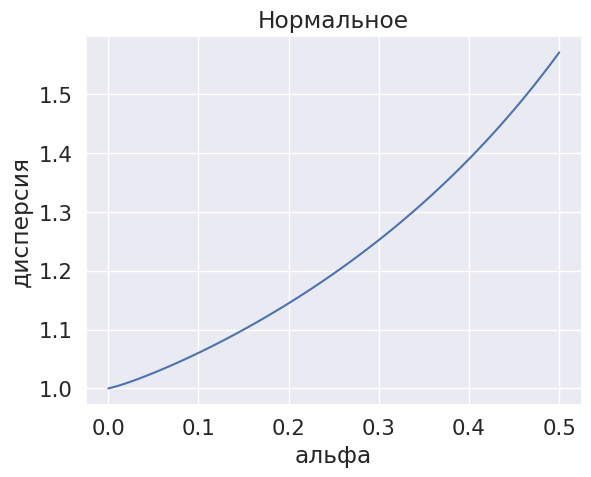

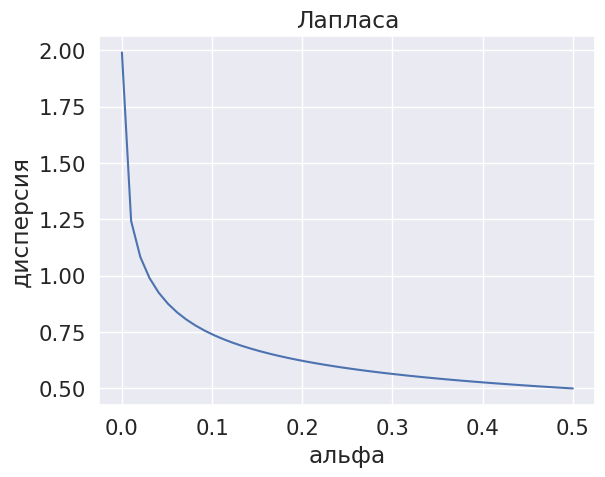

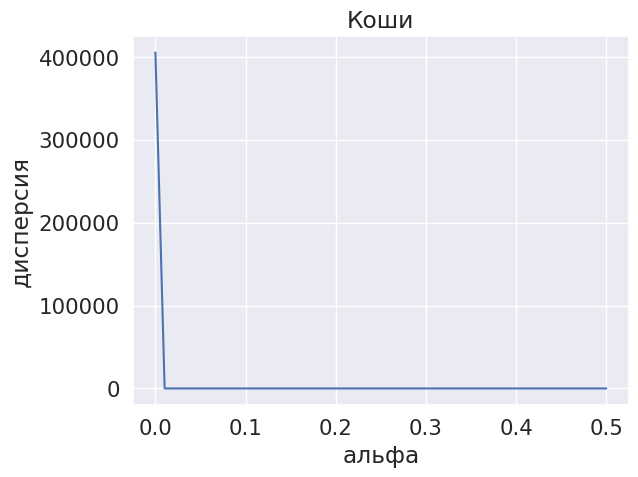

In [62]:
from scipy.stats import norm, laplace, cauchy
import scipy.integrate
def AsimptoticVarIntegrate(dist, alpha):
    u1_alpha = dist.ppf(1 - alpha)
    if (dist == sps.laplace):
      u1_alpha = laplace.ppf(1-alpha, scale = 1 / np.sqrt(2))
    var = scipy.integrate.quad(lambda x: x**2 * dist.pdf(x), 0, u1_alpha)[0] + alpha * u1_alpha ** 2
    return 2 * var / (1 - 2 * alpha) ** 2

dists = [sps.norm, sps.laplace, sps.cauchy]
dist_names = ['Нормальное', 'Лапласа', 'Коши']
alfs = np.linspace(0.000001, 0.49999999, 50)
for i, dist in enumerate(dists):
  print(dist)
  vars = []
  for a in alfs:
    vars.append(AsimptoticVarIntegrate(dist, a))
  plt.plot(alfs, vars, linestyle='-', label=dist_names[i])
  plt.xlabel('альфа')
  plt.ylabel('дисперсия')
  plt.title(f'{dist_names[i]}')
  plt.grid(True)
  plt.show()

по этим трем графикам видно, что дисперсия коши при маленьких альфа улетает в бесконечность. нарисуем график для коши еще раз с минимальным значением альфа побольше:

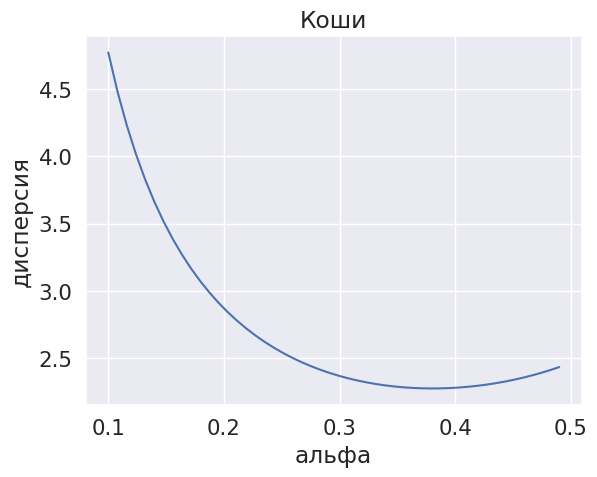

In [63]:
vars = []
alfs = np.linspace(0.1, 0.49, 50)
dist = sps.cauchy
i = 2
for a in alfs:
  vars.append(AsimptoticVarIntegrate(dist, a))
plt.plot(alfs, vars, linestyle='-', label=dist_names[i])
plt.xlabel('альфа')
plt.ylabel('дисперсия')
plt.title(f'{dist_names[i]}')
plt.grid(True)
plt.show()

у нормального дисперсия почти равномерно растет с ростом альфы, ведь усечение из-за альфы удаляет только небольшую часть данных с краёв распределения

у лапласа хвосты тяжелее, чем у нормального, то есть усечение удаляет значительную часть данных относительно нормального. интеграл в числителе должен увеличиваться быстрее, чем у нормального, потому что у нас уменьшается вариативность данных внутри оставшегося после обрезания участка распределения. то есть дисперсия плавно уменьшается

у коши же тоже очень тяжелые хвосты и усечение идет нам на руку, ведь мы обрубаем их по краям и лишаем нашу выборку каких-то страшных больших выбросов. График дисперсии похож на параболу, ведь сначала мы отсекаем кусочки распределения и это идет нам на руку, но потом мы начинаем удалять уже стоящую информацию, ухужшая дисперсию

таким образом, поведение всех полученных графиков можно назвать оправданным

In [64]:
def truncated_var(sample, alpha=0.3):
    sample.sort()
    size = len(sample)
    sample = sample[int(alpha * size) : int((1 - alpha) * size)]
    truncated_var = np.var(sample)
    return truncated_var

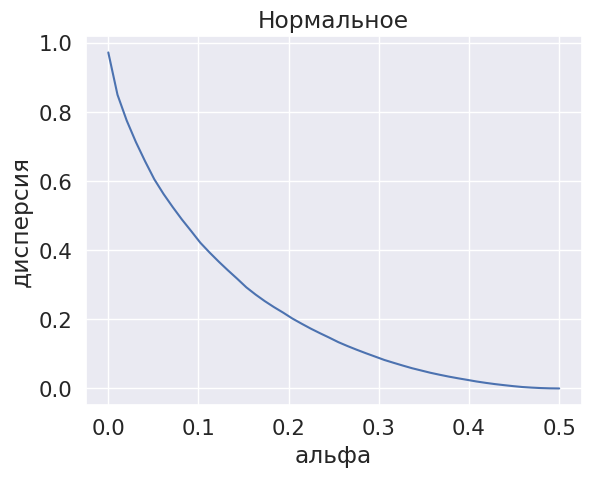

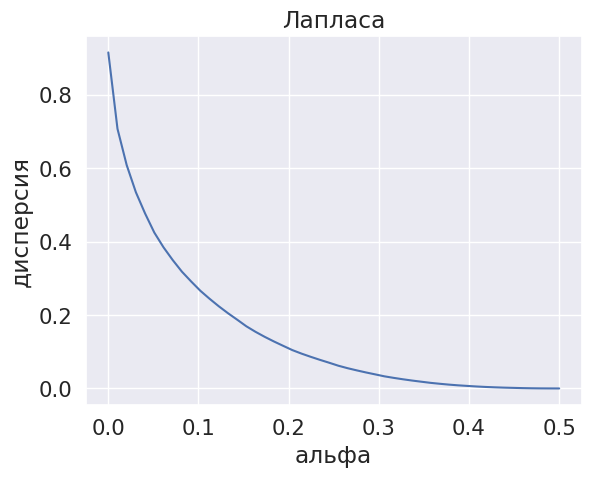

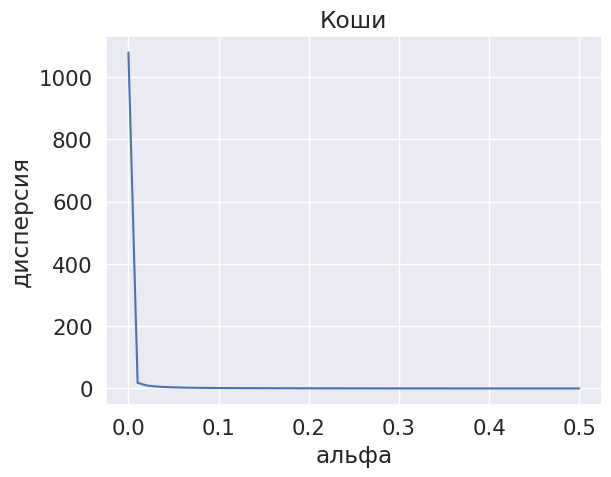

In [65]:
dists = [norm, laplace, cauchy]
samples = []
s_normal = np.random.normal(0, 1, n)
s_laplace = np.random.laplace(0, 1/np.sqrt(2), n)
s_cauchy = np.random.standard_cauchy(n)
samples = [s_normal, s_laplace, s_cauchy]
dist_names = ['Нормальное', 'Лапласа', 'Коши']
alfs = np.linspace(0.000001, 0.49999999, 50)
for i, sample in enumerate(samples):
  print(dist)
  vars = []
  for a in alfs:
    vars.append(truncated_var(sample, alpha=a))
  plt.plot(alfs, vars, linestyle='-', label=dist_names[i])
  plt.xlabel('альфа')
  plt.ylabel('дисперсия')
  plt.title(f'{dist_names[i]}')
  plt.grid(True)
  plt.show()

в этой ячейке я считаю теоретическую выборочную дисперсию в зависимомсти от параметра альфа. Этот параметр показывает, какая у меня разница между элементами выборки при выбранных квантилях. То есть в любом случае, чем больше мы ее обрубаем, тем меньше элементов у нас остается. А обрубаем мы начиная с хвостов, то есть остаются элементы, примерно одинаковые, то есть дисперсия, ожидаемо спускается до нуля при росте параметра альфа.

4.5) Дополнительный пункт на 5 баллов.

Докажите предложенную теорему.

5) Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`. Сравните результаты с теоретической

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=False)

for i, (color, distribution, name) in enumerate(zip(colors, dists, dist_names)):
    asimptotic_vars = [AsimptoticVarIntegrate(distribution, alpha) for alpha in alfs]

    axes[i].plot(alfs, asimptotic_vars, color=color)
    axes[i].set_title(name)
    axes[i].set_xlabel('Альфа')
    axes[i].set_ylabel('Асимптотическая дисперсия')
    if name == "Нормальное":
        axes[i].set_ylim(0, 2)
        print("NORM")
    elif name == "Лапласа":
        axes[i].set_ylim(0, 1)
        print("LAP")
    elif name == "Коши":
        axes[i].set_ylim(0, 6)
        print("CAUCH")

fig.suptitle('Асимптотическая дисперсия от а', fontsize=16)

plt.show()

NORM
LAP
CAUCH


выводы тут абсолютно такие же, как и в блоке, где я строил графики асимптотической дисперсии

6) Breakdown point в статистике неформально называется такое наибольшее число $x$ от 0 до 1, что если изменить больше $(100\cdot x)\%$ наблюдений выборки на выбросы, то оценка "пойдёт в разнос" и её значение может оказаться сколь угодно большим по модулю, как если бы вся выборка состояла из выбросов.

Предположите, как Breakdown point зависит от параметра $\alpha$.

Ответ: Breakdown point для усеченного среднего равен альфа. То есть, если более альфа доли выборки заменены выбросами, то тогда всё будет плохо

И проверьте своё предположение моделированием. Будем считать, что вместо произвольных $(100\cdot x)\%$ выборки будет записано какое-то заранее подобранное достаточно большое число с положительным или отрицательным знаком.

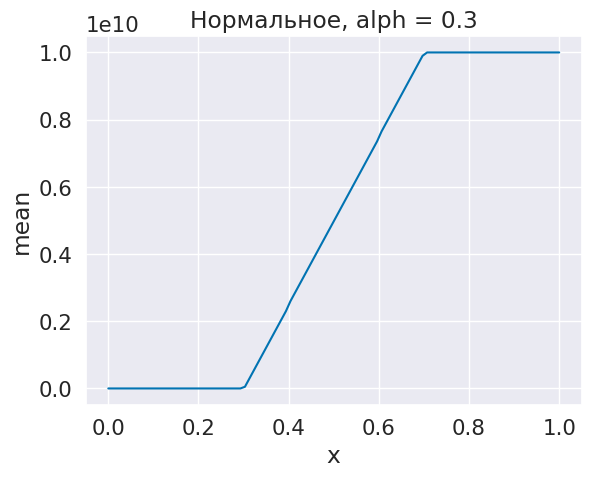

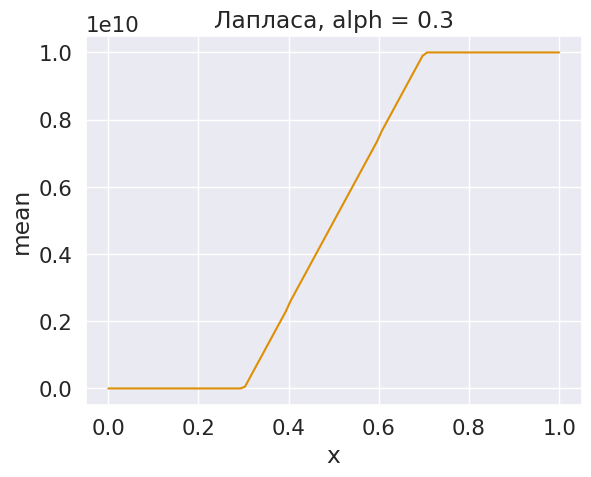

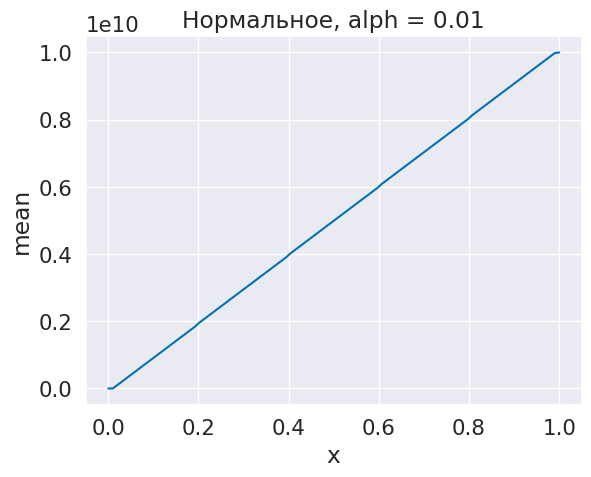

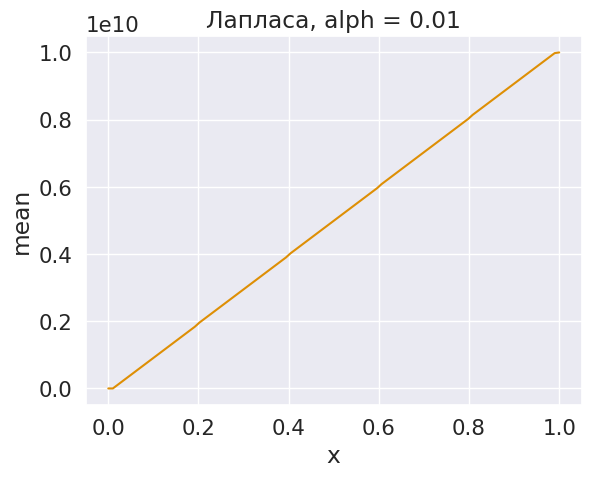

In [67]:
big_numb = 1e10
def simulate_breakdown(sample, percent,  alpha = 0.3):
    n = len(sample)
    num_contaminated = int(n * percent)
    contaminated_sample = sample.copy()
    contaminated_sample[:num_contaminated] = big_numb
    tm = truncated_mean(contaminated_sample, alpha)
    return tm

xs = np.linspace(0, 1, 100)
means = []
i = 0
for x in xs:
  means.append(simulate_breakdown(sample_normal, x))
plt.plot(xs, means, linestyle='-', color = colors[i])
plt.xlabel('x')
plt.ylabel('mean')
plt.title(f'{dist_names[i]}, alph = 0.3')
plt.grid(True)
plt.show()

means = []
i = 1
for x in xs:
  means.append(simulate_breakdown(sample_laplace, x))
plt.plot(xs, means, linestyle='-', color = colors[i])
plt.xlabel('x')
plt.ylabel('mean')
plt.title(f'{dist_names[i]}, alph = 0.3')
plt.grid(True)
plt.show()

means = []
i = 2
for x in xs:
  means.append(simulate_breakdown(sample_cauchy, x))
plt.plot(xs, means, linestyle='-', color = colors[i])
plt.xlabel('x')
plt.ylabel('mean')
plt.title(f'{dist_names[i]}, alph = 0.3')
plt.grid(True)
plt.show()



xs = np.linspace(0, 1, 100)
means = []
i = 0
for x in xs:
  means.append(simulate_breakdown(sample_normal, x, 0.01))
plt.plot(xs, means, linestyle='-', color = colors[i])
plt.xlabel('x')
plt.ylabel('mean')
plt.title(f'{dist_names[i]}, alph = 0.01')
plt.grid(True)
plt.show()

means = []
i = 1
for x in xs:
  means.append(simulate_breakdown(sample_laplace, x, 0.01))
plt.plot(xs, means, linestyle='-', color = colors[i])
plt.xlabel('x')
plt.ylabel('mean')
plt.title(f'{dist_names[i]}, alph = 0.01')
plt.grid(True)
plt.show()

means = []
i = 2
for x in xs:
  means.append(simulate_breakdown(sample_cauchy, x, 0.01))
plt.plot(xs, means, linestyle='-', color = colors[i])
plt.xlabel('x')
plt.ylabel('mean')
plt.title(f'{dist_names[i]}, alph = 0.01')
plt.grid(True)
plt.show()

да, как и предполагалось, иксы, расположенные на расстоянии альфа от 0 и единицы не влияют на среднее, а при замене оставшихся данных, среднее растет. выгоднее всего использовать альфа 0.3

7) Для каждого распределения на отдельном графике по всем префиксам постройте значение трех оценок: среднего, медианы и усечённого среднего порядка $0.35$. Для усечённого среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [200]:
def compute_estimates(sample, alpha = 0.35):
    means = []
    medians = []
    t_means = []
    for i in range(1, len(sample) + 1):
        sub_sample = sample[:i]
        means.append(np.mean(sub_sample))
        medians.append(np.median(sub_sample))
        t_means.append(truncated_mean(sub_sample, alpha))
    return means, medians, t_means

**Нормальное распределение**

In [201]:
means_normal, medians_normal, t_means_normal = compute_estimates(sample_normal)
print(np.var(means_normal))
print(np.var(medians_normal))
print(np.var(t_means_normal))

0.009427192305281409
0.014793057513133551
0.009239268761723625


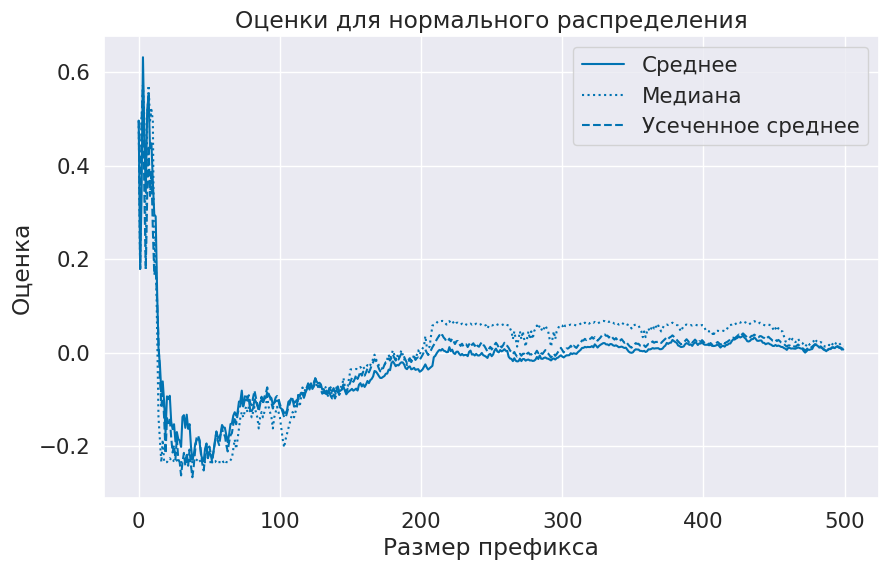

In [202]:
plt.figure(figsize=(10, 6))
plt.plot(means_normal, color=color_for_normal, label='Среднее')
plt.plot(medians_normal, color=color_for_normal, linestyle=':', label='Медиана')
plt.plot(t_means_normal, color=color_for_normal, linestyle='--', label='Усеченное среднее')
plt.xlabel('Размер префикса')
plt.ylabel('Оценка')
plt.title('Оценки для нормального распределения')
plt.legend()
plt.show()

Все три оценки быстро сходятся к нулю с ростом размера выборки.

**Распределение Лапласа**

In [203]:
means_laplace, medians_laplace, t_means_laplace = compute_estimates(sample_laplace)
print(np.var(means_laplace))
print(np.var(medians_laplace))
print(np.var(t_means_laplace))

0.003814752557575454
0.006543724313231669
0.005140897465821978


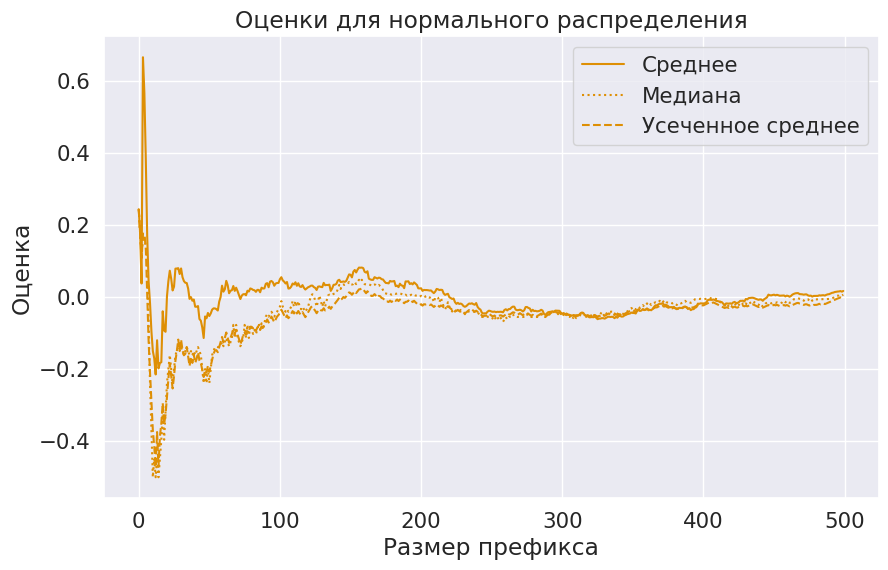

In [204]:
plt.figure(figsize=(10, 6))
plt.plot(means_laplace, color=color_for_laplace, label='Среднее')
plt.plot(medians_laplace, color=color_for_laplace, linestyle=':', label='Медиана')
plt.plot(t_means_laplace, color=color_for_laplace, linestyle='--', label='Усеченное среднее')
plt.xlabel('Размер префикса')
plt.ylabel('Оценка')
plt.title('Оценки для нормального распределения')
plt.legend()
plt.show()

Аналогично нормальному, все оценки стабильны.

**Распределение Коши**

In [205]:
means_cauchy, medians_cauchy, t_means_cauchy = compute_estimates(sample_cauchy)
print(np.var(means_cauchy))
print(np.var(medians_cauchy))
print(np.var(t_means_cauchy))

0.3113585029440213
0.04606326765319575
0.042310978710516374


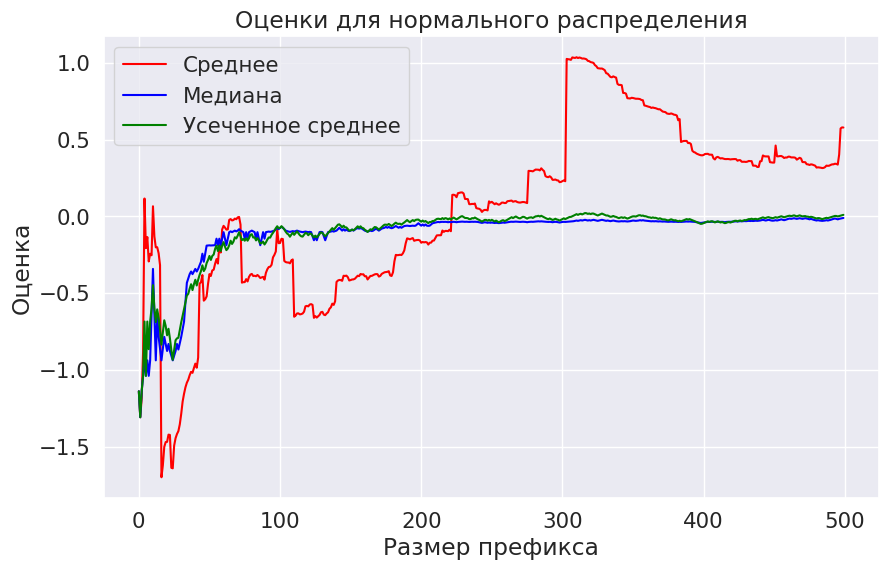

In [206]:
plt.figure(figsize=(10, 6))
plt.plot(means_cauchy, color='red', label='Среднее')
plt.plot(medians_cauchy, color='blue', label='Медиана')
plt.plot(t_means_cauchy, color='green', label='Усеченное среднее')
plt.xlabel('Размер префикса')
plt.ylabel('Оценка')
plt.title('Оценки для нормального распределения')
plt.legend()
plt.show()

Среднее сильно колеблется и не стабилизируется. Медиана и усеченное среднее гораздо более стабильны и близки к нулю.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[0.012991459152888655, 0.022658892816304753, 0.005309680968211384, 0.018729125250797007, 0.006899384869219187, 0.025288581426497512, 0.029033392772533636, 0.004088570536119008, 0.004895933546022095, 0.005374887859279431, 0.01633148842179091, 0.0049438030930498075, 0.014629838044835981, 0.0317909773918202, 0.023791696591682246, 0.007740953787380882, 0.0072209313186344685, 0.02170477310342696, 0.040863086093711504, 0.025287399035888208, 0.006419773278923759, 0.034298924236291446, 0.025060923539011303, 0.0035927711620984807, 0.029786494053516688]


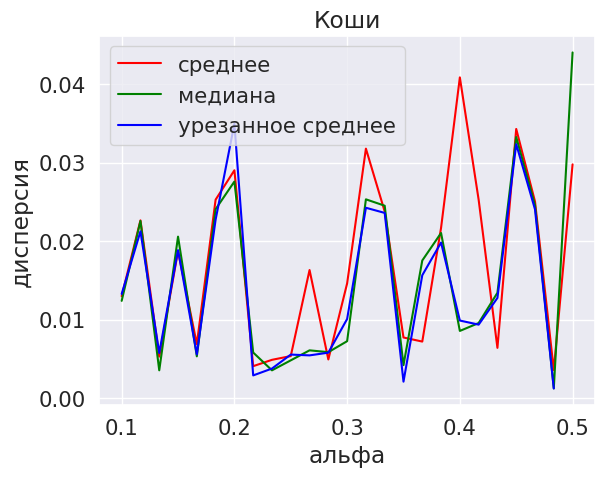

In [207]:
alphs = np.linspace(0.1, 0.5, 25)
var_means = []
var_med = []
var_t_means = []
for a in alphs:
  sample_laplace = np.random.laplace(loc=0, size=N)
  means_laplace, medians_laplace, t_means_laplace = compute_estimates(sample_laplace, alpha = a)
  var_means.append(np.var(means_laplace))
  var_med.append(np.var(medians_laplace))
  var_t_means.append(np.var(t_means_laplace))
print(var_means)
plt.plot(alphs, var_means, linestyle='-', color = 'red', label = 'среднее')
plt.plot(alphs, var_med, linestyle='-', color = 'green', label = 'медиана')
plt.plot(alphs, var_t_means, linestyle='-', color = 'blue', label = 'урезанное среднее')
plt.xlabel('альфа')
plt.ylabel('дисперсия')
plt.legend()
plt.title(f'{dist_names[i]}')
plt.grid(True)
plt.show()

In [208]:
alphs = np.linspace(0.1, 0.5, 25)
var_means = []
var_med = []
var_t_means = []
for a in alphs:
  sample = np.random.normal(loc=0, size=N)
  means_laplace, medians_laplace, t_means_laplace = compute_estimates(sample, alpha = a)
  var_means.append(np.var(means_laplace))
  var_med.append(np.var(medians_laplace))
  var_t_means.append(np.var(t_means_laplace))
print(var_means)
plt.plot(alphs, var_means, linestyle='-', color = 'red', label = 'среднее')
plt.plot(alphs, var_med, linestyle='-', color = 'green', label = 'медиана')
plt.plot(alphs, var_t_means, linestyle='-', color = 'blue', label = 'урезанное среднее')
plt.xlabel('альфа')
plt.ylabel('дисперсия')
plt.legend()
plt.title(f'{dist_names[i]}')
plt.grid(True)
plt.show()

[0.0020842703650016886, 0.004786980798952098, 0.0030404120744609033, 0.008095663907529851, 0.006048605093555787, 0.005304103499430695, 0.006828214229666652, 0.0064935504863329815, 0.01464275197427114, 0.0065373474090060345, 0.02175700973843297, 0.006694145234252848, 0.0055150626624918256, 0.00276917670116814, 0.0047700327354251735, 0.004556564994729948, 0.007752300021044248, 0.007427746592832349, 0.004091775532203544, 0.010862110786058329, 0.008258726550345572, 0.00694085161822513, 0.004960630719914196, 0.007561466067613127, 0.004158422259558084]


In [209]:
alphs = np.linspace(0.1, 0.5, 25)
var_means = []
var_med = []
var_t_means = []
for a in alphs:
  sample = np.random.standard_cauchy(size=N)
  means, medians, t_means = compute_estimates(sample, alpha = a)
  var_means.append(np.var(means))
  var_med.append(np.var(medians))
  var_t_means.append(np.var(t_means))
print(var_means)
plt.plot(alphs, var_means, linestyle='-', color = 'red', label = 'среднее')
plt.plot(alphs, var_med, linestyle='-', color = 'green', label = 'медиана')
plt.plot(alphs, var_t_means, linestyle='-', color = 'blue', label = 'урезанное среднее')
plt.xlabel('альфа')
plt.ylabel('дисперсия')
plt.legend()
plt.title(f'{dist_names[i]}')
plt.grid(True)
plt.show()

[0.21093413266582076, 2.726961972258837, 0.3675309955113282, 0.44514651433709296, 0.06732381813467841, 9.941412996344647, 0.5828885988824964, 2.7044046459369806, 1.050657245677218, 0.3712413634219806, 289.08692710953403, 31.845629940874087, 0.44454855765797147, 1.2452781310336003, 7.127695387564656, 0.6542270432867899, 68.58407055301271, 0.3102445301605187, 27.26568184332363, 2.6265429570829966, 26.87509903735935, 1.8221761117173392, 4.164275944016931, 15.64420579932827, 4.235888137504346]


Проанализируйте полученные графики. Проанализируйте графики дисперсий оценок. Сделайте выводы.

для нормального и лапласа можно увидеть такие закономерности: дисперсия усеченного среднего увеличивается с ростом альфа, дисперсия медианы остается примерно постоянной, дисперсия среднего минимальна при альфа 0


для коши же медиана не зависит от альфы, ведь она робастная оценка, дисперсия среднего очень большая, ведь коши имеет очень тяжелые хвосты

**Опциональная часть для самых смелых (20 баллов)**

Мы знаем, что существует Оценка Максимального Правдоподобия:

$\hat{\theta} = argmin_{\theta}(-log(f_{\theta}(x)))$, $f_{\theta}(x)$ --- правдоподобие выборки. В таком же виде можно выписать и оценки средним, медианой и усечённым средним:

$\hat{\theta} = argmin_{\theta}(\sum_{i=1}^n\rho(x_i - \theta))$.

В общем случае, такая оценка называется обобщённой оценкой максимального правдоподобия или $M$-оценкой. Функция $\rho$ называется функцией влияния.

1) Как должна выглядеть функция $\rho$, чтобы результатом было усечённое среднее? Указание: "усекать" можно не только по квантилю, но и по числу

Ответ:

2) Эквивалентно задачу оптимизации можно писать в виде системы уравнений $(\sum_{i=1}^n\psi(x_i - \theta)) = 0$. Сравните два определения и скажите, какое из них шире (определяет больше возможных оценок) и как они связаны.

Ответ:

3) Самое интересное. Для трёх распределений из первой части постройте M-оценки для разных функций $\rho$ или $\psi$. Ищите максимум градиентным спуском, а ноль функции --- методом Ньютона.

Примеры функций влияния можно взять вот тут: https://en.wikipedia.org/wiki/Robust_statistics#M-estimators

Ещё можно попросить в чате Том Древних Заклинаний (книжку по робастной статистике) и прочитать там главу 3, где есть примеры M- и L- оценок (что такое L-оценка при желании можете узнать там же сами)

3.5) Выразите усечённое среднее как L-оценку

Ответ:

4) Сравните результаты, полученные для трёх распределений и разных функций влияния.

5) Оцените Breakdown point предложенных функций. Сделайте вывод о том, как взаимосвязаны точность оценки и Breakdown point.

Сделайте единый вывод о робастном оценивании:

*Дисклеймер: * 20 баллов будет ставиться только в случае, если Вы попробуете хотя бы 5 существенно различающихся функций влияния и построите хотя бы одну L-оценку (без которой будет 15), а так же укажете, в каких оценках лучше точность и лучше Breakdown Point. В идеале нужно решить трейдофф между точностью и робастностью.

# Задача 2

## Wine dataset

Да, аспект-император взял с собой лучшее вино Трёх Морей и пьёт его, пока идёт битва! В этой задаче Вам предлагается поработать с реальными данными и провести оценивания состава вина.

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье.

In [19]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 93.9MB/s]


In [211]:
import pandas as pd

In [20]:
data = pd.read_csv("winequality-red.csv")

In [21]:
data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [22]:
maximum = data['alcohol'].max()
print(maximum)

14.9


In [23]:
print(data['alcohol'].size)

1599


In [24]:
data['category'] = pd.cut(
    data['alcohol'],
    bins=[0, 10, 12, maximum],
    labels=['low alcohol', 'medium alcohol', 'high alcohol']
)
count_of_low = data['category'].value_counts().get('low alcohol')
count_of_med = data['category'].value_counts().get('medium alcohol')
count_of_high= data['category'].value_counts().get('high alcohol')
print(count_of_low, count_of_med, count_of_high)
print(count_of_low+ count_of_med+ count_of_high)

747 711 141
1599


поделили, все нормально

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [25]:
mean_median = data.groupby('category')['residual sugar'].agg(['mean', 'median'])
mean_median

<ipython-input-25-d9615b1dcb96>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_median = data.groupby('category')['residual sugar'].agg(['mean', 'median'])


mean  median
category                        
low alcohol     2.445984     2.1
medium alcohol  2.592264     2.2
high alcohol    2.760993     2.3

Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Средние и медианные значения остаточного сахара по категориям содержания алкоголя показывают, что с увеличением содержания алкоголя среднее и медиана остаточного сахара незначительно меняются. Это указывает на то, что распределение остаточного сахара относительно равномерно по всем категориям алкоголя. из того, что они не совпадают, можно сделать вывод, о том, что почти у всех группок есть выбросы

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

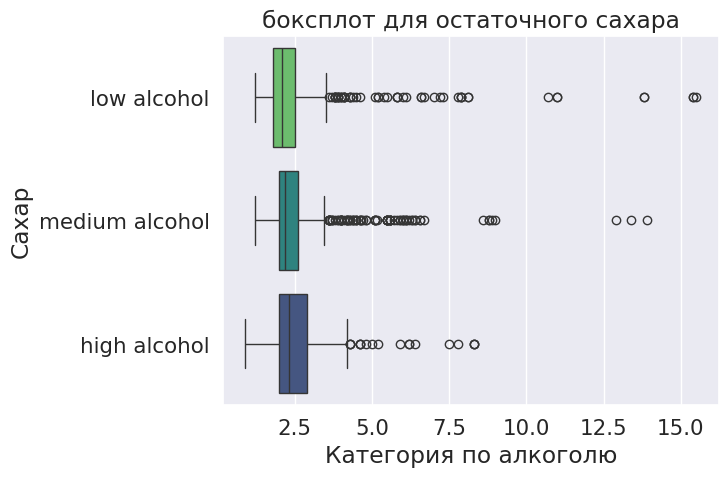

In [26]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
sns.boxplot(x='residual sugar', y='category', data=data, palette=palette, hue='category')
plt.xlabel('Категория по алкоголю')
plt.ylabel('Сахар')
plt.title('боксплот для остаточного сахара')
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:** На графике видно, что распределение остаточного сахара в каждой категории содержит выбросы и слегка скошено. Средние значения могут быть искажены из-за выбросов, поэтому медиана является более надежной оценкой центральной тенденции в данном случае. Самые страшные выбросы наблюдаются у среднего и низкого алкоголя

Проанализируйте обе выборки на предмет выбросов. Сколько их? Какую оценку параметра сдвига лучше использовать (считая обе выборки нормальными)?

In [27]:
outlier_counts = {}

for category in data['category'].unique():
    cat_data = data[data['category'] == category]['residual sugar']
    Q1 = cat_data.quantile(0.3)
    Q3 = cat_data.quantile(0.7)
    normik = Q3 - Q1
    lower_bound = Q1 - 1.5 * normik
    upper_bound = Q3 + 1.5 * normik
    outliers = cat_data[(cat_data < lower_bound) | (cat_data > upper_bound)]
    outlier_counts[category] = outliers.count()

outlier_counts

{'low alcohol': 79, 'medium alcohol': 84, 'high alcohol': 33}

Ответ: выбросам я считаю всех, кто находится далеко от нижней и верхней границы, которые считаются дальше, чем 1.5*интервал, равный разнице от 70% и 30% квантилей (нашли в прошлой задаче, что это лучшие значений). Таким образом, вычислили, что в низком уровне алкоголя 79 экземпляров, в среднем 84, в высоком 33. То есть как я и говорил, в высокосодержащихся по алкоголю экземплярах мало выбросов

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

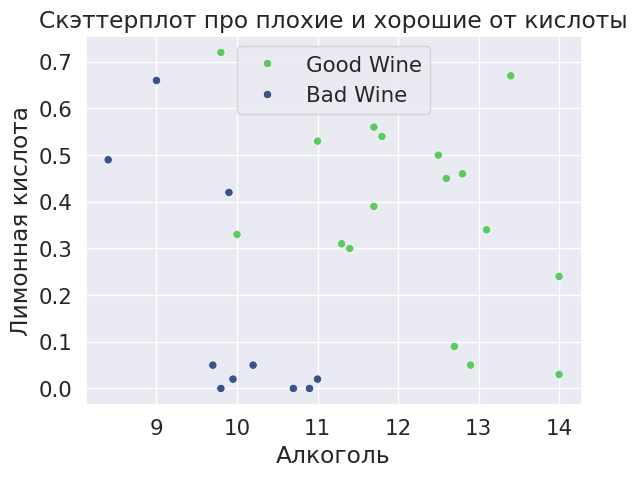

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
267            7.9              0.35         0.46             3.6      0.078   
278           10.3              0.32         0.45             6.4      0.073   
390            5.6              0.85         0.05             1.4      0.045   
440           12.6              0.31         0.72             2.2      0.072   
455           11.3              0.62         0.67             5.2      0.086   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
267                 15.0                  37.0   0.9973  3.35       0.86   
278                  5.0                  13.0   0.9976  3.23       0.82   
390                 12.0                  88.0   0.9924  3.56       0.82   
440                  6.0                  29.0   0.9987  2.88       0.82   
455                  6.0                  19.0   0.9988  3.22       0.69   

     alcohol  quality      category  
267     12.8        8  high alcohol  
278     12.6        8  high alcohol  
390     12.9        8  high alcohol  
440      9.8        8   low alcohol  
455     13.4        8  high alcohol

In [28]:
good_wine = data[data['quality'] == 8]
bad_wine = data[data['quality'] == 3]

scatter_data = pd.concat([good_wine, bad_wine])
scatter_data['quality_label'] = scatter_data['quality'].map({3: 'Bad Wine', 8: 'Good Wine'})

scatter_palette = [palette[0], palette[-1]]
sns.scatterplot(
    x='alcohol', y='citric acid',
    hue='quality_label',
    data=scatter_data,
    palette=scatter_palette
)
plt.xlabel('Алкоголь')
plt.ylabel('Лимонная кислота')
plt.title('Скэттерплот про плохие и хорошие от кислоты')
plt.legend()
plt.show()
good_wine.head()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

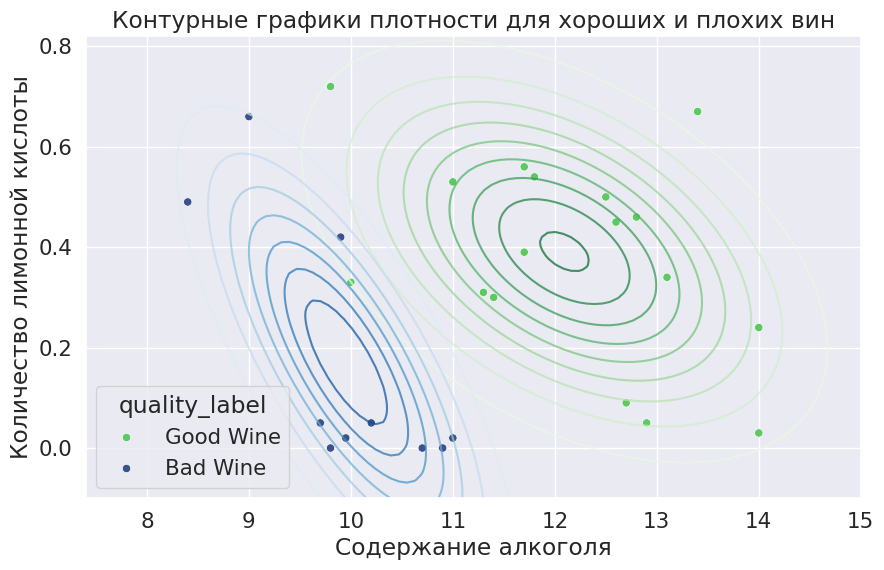

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
267            7.9              0.35         0.46             3.6      0.078   
278           10.3              0.32         0.45             6.4      0.073   
390            5.6              0.85         0.05             1.4      0.045   
440           12.6              0.31         0.72             2.2      0.072   
455           11.3              0.62         0.67             5.2      0.086   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
267                 15.0                  37.0   0.9973  3.35       0.86   
278                  5.0                  13.0   0.9976  3.23       0.82   
390                 12.0                  88.0   0.9924  3.56       0.82   
440                  6.0                  29.0   0.9987  2.88       0.82   
455                  6.0                  19.0   0.9988  3.22       0.69   

     alcohol  quality      category  
267     12.8        8  high alcohol  
278     12.6        8  high alcohol  
390     12.9        8  high alcohol  
440      9.8        8   low alcohol  
455     13.4        8  high alcohol

In [30]:
from scipy.stats import multivariate_normal
bad_wine_data = bad_wine[['alcohol', 'citric acid']]
mu_bad = bad_wine_data.mean().values
sigma_bad = bad_wine_data.cov().values

good_wine_data = good_wine[['alcohol', 'citric acid']]
mu_good = good_wine_data.mean().values
sigma_good = good_wine_data.cov().values

x = np.linspace(scatter_data['alcohol'].min()-1, scatter_data['alcohol'].max()+1, 100)
y = np.linspace(scatter_data['citric acid'].min()-0.1, scatter_data['citric acid'].max()+0.1, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

rv_bad = multivariate_normal(mean=mu_bad, cov=sigma_bad)
Z_bad = rv_bad.pdf(pos)

rv_good = multivariate_normal(mean=mu_good, cov=sigma_good)
Z_good = rv_good.pdf(pos)

plt.figure(figsize=(10, 6))
plt.contour(x, y, Z_good, cmap='Greens', levels=10, alpha=0.7)
plt.contour(x, y, Z_bad, cmap='Blues', levels=10, alpha=0.7)

sns.scatterplot(data=scatter_data, x='alcohol', y='citric acid', hue='quality_label', palette=scatter_palette)

plt.title('Контурные графики плотности для хороших и плохих вин')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Количество лимонной кислоты')
plt.show()
good_wine.head()

Предложите свои робастные (устойчивые к выбросам) оценки параметров $\mu$, $\sigma$, посчитайте их. Сравните результат с ОМП. Какой оценке больше доверия?

In [39]:
from sklearn.covariance import MinCovDet

mcd_bad = MinCovDet().fit(bad_wine_data)
robust_mu_bad = mcd_bad.location_
robust_sigma_bad = mcd_bad.covariance_

mcd_good = MinCovDet().fit(good_wine_data)
robust_mu_good = mcd_good.location_
robust_sigma_good = mcd_good.covariance_
print("ОМП мю для плохих:", mu_bad)
print("Робастная мю для плохих:", robust_mu_bad)
print("ОМП мю для хороших:", mu_good)
print("Робастная мю для хороших:", robust_mu_good)

ОМП мю для плохих: [9.955 0.171]
Робастная мю для плохих: [10.32142857  0.02      ]
ОМП мю для хороших: [12.09444444  0.39111111]
Робастная мю для хороших: [11.9         0.45153846]


Робастные оценки средних значений очень близки к оценкам ОМП, что предполагает, что выбросы могут не иметь существенного влияния на оценки средних значений в данном случае. Это видно по обоим параметрам: и по алкоголю, и по кислоте

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [35]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

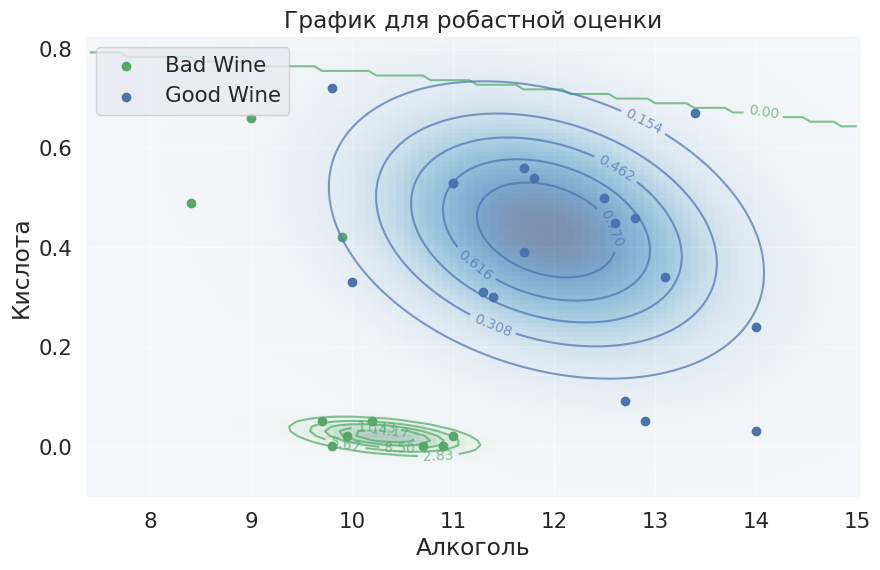

In [38]:
x = np.linspace(scatter_data['alcohol'].min() - 1, scatter_data['alcohol'].max() + 1, 100)
y = np.linspace(scatter_data['citric acid'].min() - 0.1, scatter_data['citric acid'].max() + 0.1, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv_bad_robust = multivariate_normal(mean=robust_mu_bad, cov=robust_sigma_bad)
Z_bad_robust = rv_bad_robust.pdf(pos)

rv_good_robust = multivariate_normal(mean=robust_mu_good, cov=robust_sigma_good)
Z_good_robust = rv_good_robust.pdf(pos)

cmap_bad = get_density_cmap("Greens")
cmap_good = get_density_cmap("Blues")

plt.figure(figsize=(10, 6))
plt.pcolormesh(X, Y, Z_bad_robust, shading='auto', cmap=cmap_bad, alpha=0.5)
plt.pcolormesh(X, Y, Z_good_robust, shading='auto', cmap=cmap_good, alpha=0.5)

levels_bad = np.linspace(np.min(Z_bad_robust), np.max(Z_bad_robust), 7)
CS_bad = plt.contour(X, Y, Z_bad_robust, levels=levels_bad, colors='g', alpha=0.7)
plt.clabel(CS_bad, inline=1, fontsize=10)

levels_good = np.linspace(np.min(Z_good_robust), np.max(Z_good_robust), 7)
CS_good = plt.contour(X, Y, Z_good_robust, levels=levels_good, colors='b', alpha=0.7)
plt.clabel(CS_good, inline=1, fontsize=10)

plt.scatter(bad_wine_data['alcohol'], bad_wine_data['citric acid'], color='g', label='Bad Wine')
plt.scatter(good_wine_data['alcohol'], good_wine_data['citric acid'], color='b', label='Good Wine')

plt.xlabel('Алкоголь')
plt.ylabel("Кислота")
plt.title('График для робастной оценки')
plt.legend()
plt.show()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** Вина, получившие наивысший балл от сомелье, имеют более высокое содержание алкоголя и кислоты по сравнению с винами, получившими наименьший балл. Плотность распределения хороших вин сосредоточена в области с высокими значениями алкоголя и лимонной кислоты, тогда как плохие вина сконцентрированы в областях с низкими значениями этих параметров.

# Задача 3

В случаях, когда ошибка в значении параметра может дорого обойтись, применяют доверительное оценивание. Вместо точечного значения параметра оценкой является отрезок, который с высокой вероятностью накрывает истинное значение параметра.

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал, построенный по оценке $\widehat{\theta}$ (который, помимо этого, нужно теоретически посчитать и написать)
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

В каждом случае при помощи моделирования проверьте, как часто параметр действительно попадает в свой доверительный интервал (генерируйте выборку выборок, по которой стройте выборку доверительных интервалов)

In [53]:
alpha = 0.95
n_max = 100
n_values = np.arange(1, n_max + 1)
theta = 10

def draw_confidence_interval(n_values, theta_estimates, lower_bounds, upper_bounds, true_theta, sample_points, title, ylim_down = 0, ylim_up = 100):
    plt.figure(figsize=(12, 6))
    plt.fill_between(n_values, lower_bounds, upper_bounds, color='skyblue', alpha=0.5, label='Доверительный интервал')
    plt.plot(n_values, theta_estimates, 'r-', label='Оценка θ')
    plt.hlines(true_theta, n_values[0], n_values[-1], colors='g', linestyles='dashed', label='Истинное θ')
    plt.scatter(n_values, sample_points, color='black', s=10, label='Выборочные точки')
    plt.xlabel('n')
    plt.ylabel('θ')
    plt.ylim(ylim_down, ylim_up)
    plt.title(title)
    plt.legend()
    plt.show()

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

его ФР равна
$$
F_θ(x) = \begin{cases}
    0, x<0, \\
    \frac{x}{θ}, & x∈[0, \theta], \\
    1, x>\theta
\end{cases}
$$
Функция распределения максимума (тета с крышкой наш)
$$
F_\hat{θ}(x) = [F_θ(x)]^n= \begin{cases}
    0, x<0, \\
    [\frac{x}{θ}]^n, & x∈[0, \theta], \\
    1, x>\theta
\end{cases}
$$
обратную на (0,1) можно записать как
$$
F_\hat{θ}(u) = θ * u^{1/n}, u \in (0,1)
$$
тогда можно посчитать и доверительный интервал:
$$
(\hat{θ_1}, \hat{θ_2}) = (F_{\hat \theta}^{-1}(\frac {1-\alpha} {2}),F_{\hat \theta}^{-1} (1 - \frac {1-\alpha} {2})) = (\theta ×(\frac {1-\alpha} {2})^{1/n},\theta \times (1 - \frac {1-\alpha} {2})^{1/n}) ⇒ P(\theta_1 \leq θ \leq \theta_2) =P (\theta ×(\frac {1-\alpha} {2})^{1/n} \leq \hat{\theta} \leq \theta \times (1 - \frac {1-\alpha} {2})^{1/n}) = α ⇒ \alpha = P (\hat\theta ×(\frac {1-\alpha} {2})^{-1/n} \leq {\theta} \leq \hat\theta \times (1 - \frac {1-\alpha} {2})^{-1/n})
$$

In [226]:
theta = 10
theta_estimates = []
lower_bounds = []
upper_bounds = []
sample_points = []

np.random.seed(0)
X = np.random.uniform(0, theta, n_max)

for n in n_values:
    X_n = X[:n]
    X_max = np.max(X_n)
    theta_hat = X_max
    theta_estimates.append(theta_hat)

    u_L = ((1 - alpha) / 2) ** (1 / n)
    u_U = (1 - (1 - alpha) / 2) ** (1 / n)

    lower_bound = theta_hat / u_U
    upper_bound = theta_hat / u_L

    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)
    sample_points.append(X_n[-1])

draw_confidence_interval(
    n_values, theta_estimates, lower_bounds, upper_bounds, theta, sample_points,
    'равномерное распределение', -1, 20
)

In [227]:
num_simulations = 1000
coverage_count = 0

for _ in range(num_simulations):
    X_sim = np.random.uniform(0, theta, n_max)
    # print(X_sim)
    X_max_sim = np.max(X_sim)

    u_L = ((1 - alpha) / 2) ** (1 / n_max)
    u_U = (1 - (1 - alpha) / 2) ** (1 / n_max)

    lower_bound = X_max_sim / u_U
    upper_bound = X_max_sim / u_L
    # print(lower_bound)

    if lower_bound <= theta <= upper_bound:
        coverage_count += 1

coverage_probability = coverage_count / num_simulations
print(f'Доля попаданий θ в доверительный интервал: {coverage_probability:.4f}')

Доля попаданий θ в доверительный интервал: 0.9400


### 2. Распределение Коши, $\theta = 10$, оценка — медиана

можно связать распределение коши и равномерное непрерывное, ведь если $ξ \in U[0,1] ⇒ \theta + tang(\pi \times (\xi - 1/2)) \text{~} Cauchy(\theta)$ (информация взята отсюда: ${https://clck.ru/3ESqdD}$)

имеем дело с медианой. она распределена по В-распределению. тангенс - монотонная функция, сдвиг и коэффициент монотонности не меняют, тогда получим:

\begin{gather}
U_{(\frac n2)}  \text{~} B(\frac n2, \frac n2 + 1) \\
\text{и тогда }\hat \theta = C_{(\frac n2)} \theta + \text{tang} [\pi ( B(\frac n2, \frac n2 + 1) - \frac 12)].
\end{gather}
получается такой доверительный интервал:
\begin{gather}
\alpha = \mathbb P \left\{ B_{\frac{1 - \alpha}{2}} \le U_{(\frac n2)} \le B_{\frac{1 - \alpha}{2}} \right\} = \\ =
\mathbb P \left\{ \theta + \text{tang} \left[ \pi \left(B_{\frac{1 - \alpha}{2}} - \frac 12 \right) \right]
\le \hat \theta \le
\theta + \text{tang} \left[ \pi \left(B_{\frac{1 + \alpha}{2}} - \frac 12 \right) \right] \right\} = \\ =
\mathbb P \left\{ \hat \theta - \text{tang} \left[ \pi \left(B_{\frac{1 + \alpha}{2}} - \frac 12 \right) \right]
\le \theta \le
\hat \theta - \text{tang} \left[ \pi \left(B_{\frac{1 - \alpha}{2}} - \frac 12 \right) \right] \right\},
\end{gather}
 $B_{\frac{1 + \alpha}2}, B_{\frac{1 - \alpha}2}$ -- квантили В-распределения.



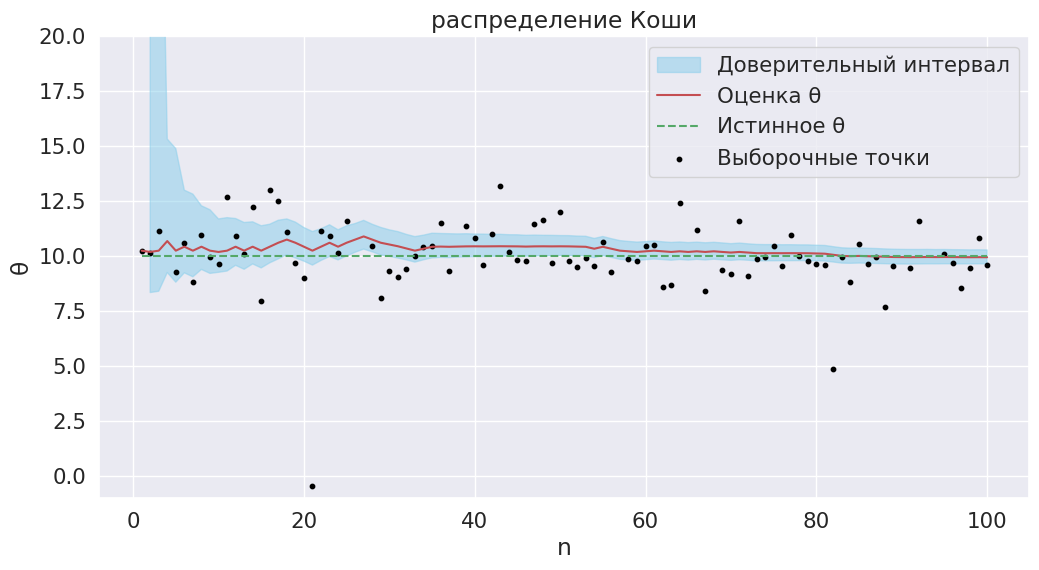

In [228]:
sample = sps.cauchy.rvs(loc=theta, size=n_max)


estimates = [np.median(sample[:x]) for x in range(1, n + 1)]

B1 = np.array([sps.beta.ppf((1 - alpha) / 2, x // 2, x // 2 + 1) for x in range(1, n + 1)]) - 0.5
B2 = np.array([sps.beta.ppf((1 + alpha) / 2, x // 2, x // 2 + 1) for x in range(1, n + 1)]) - 0.5

times = np.arange(1, n + 1)
lower_bound = estimates - np.tan(np.pi * (B2))
upper_bound = estimates - np.tan(np.pi * (B1))
draw_confidence_interval(
    n_values, estimates, lower_bound, upper_bound, theta, sample,
    'распределение Коши', -1, 20
)

In [230]:
from scipy.stats import beta

num_simulations = 1000
coverage_count = 0

for _ in range(num_simulations):
    sample = cauchy.rvs(loc=theta, size=n)
    median_estimate = np.median(sample)
    a = n // 2
    b = n - a + 1 #задали параметры для бета-распределения (те, которые в теор. выкладке моей)
    B1 = beta.ppf((1 - alpha) / 2, a, b) - 0.5
    B2 = beta.ppf((1 + alpha) / 2, a, b) - 0.5
    lower_bound = median_estimate - np.tan(np.pi * B2)
    upper_bound = median_estimate - np.tan(np.pi * B1)
    if lower_bound <= theta <= upper_bound:
      coverage_count += 1

coverage_probability = coverage_count / num_simulations
print(f'Доля попаданий θ в доверительный интервал: {coverage_probability:.4f}')

Доля попаданий θ в доверительный интервал: 0.9630


### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

воспольщуемся ЦПТ (в форме Леви):
$$
\sqrt{n} \frac {\overline{X_n}-\theta}{\sqrt{\overline{X_n}}} → N(0,1), n → ∞
$$
$$
P(T_{\frac{1 - \alpha}{2}} \le \sqrt{\frac{n}{\overline{X_n}}}(\overline{X_n}- \theta) \le
T_{\frac{1 + \alpha}{2}}) \rightarrow \alpha \\
P(T_{\frac{1 - \alpha}{2}} \sqrt{\frac{\overline{X_n}}{n}} - \overline{X_n} \le -\theta \le T_{\frac{1 + \alpha}{2}} \sqrt{\frac{\overline{X_n}}{n}} - \overline{X_n}) \rightarrow \alpha \\
P(\overline{X_n} - T_{\frac{1 + \alpha}{2}} \sqrt{\frac{\overline{X_n}}{n}} \le \theta \le
\overline{X_n} - T_{\frac{1 - \alpha}{2}} \sqrt{\frac{\overline{X_n}}{n}} ) \rightarrow \alpha
$$

In [231]:
theta = 10
n = 100
sample = sps.poisson.rvs(mu=theta, size=n)

times = np.arange(1, n + 1)
estimates = np.cumsum(sample) / times

B1 = sps.norm.ppf((1 - alpha) / 2)
B2 = sps.norm.ppf((alpha + 1) / 2)
lower_bound = estimates - np.sqrt(estimates / times) * B2
upper_bound = estimates - np.sqrt(estimates / times) * B1
draw_confidence_interval(
    n_values, estimates, lower_bound, upper_bound, theta, sample,
    'распределение пуассона', -1, 20
)

In [233]:
from scipy.stats import poisson

theta = 10
n = 100
alpha = 0.95
num_simulations = 1000
coverage_count = 0

B1 = norm.ppf((1 - alpha) / 2)
B2 = norm.ppf((1 + alpha) / 2)

for _ in range(num_simulations):
    sample = poisson.rvs(mu=theta, size=n)
    estimates = np.mean(sample)
    helper = np.sqrt(estimates / n)
    lower_bound = estimates - B2 * helper
    upper_bound = estimates - B1 * helper
    if lower_bound <= theta <= upper_bound:
        coverage_count += 1

coverage_probability = coverage_count / num_simulations
print(f'Доля попаданий θ в доверительный интервал: {coverage_probability:.4f}')

Доля попаданий θ в доверительный интервал: 0.9570


### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

для него нам известны матож и дисперсия: $EX_1 = λ\theta, DX_1 = λθ^2$
снова по ЦПТ имеем:
$$
\sqrt{n} * \frac{ \overline{X_n}-\theta}{\theta \sqrt{\lambda}} → N(0,1), n → ∞
$$
Тогда проделаем преобразования, аналогичные тем, что были для Пуассона:
$$
P(\sqrt \lambda T_{\frac{1 - \alpha}{2}} \le \sqrt{n}(\frac{\overline{X_n}}{\theta} - \lambda ) \le \sqrt \lambda T_{\frac{1 + \alpha}{2}}) \rightarrow \alpha \\
P(\sqrt \frac{\lambda}{n} T_{\frac{1 - \alpha}{2}} + \lambda \le \frac{\overline{X_n}}{\theta} \le \sqrt \frac{\lambda}{n} T_{\frac{1 + \alpha}{2}} + \lambda) \rightarrow  \alpha \\
P(\frac{\overline{X_n}}{\sqrt \frac{\lambda}{n} T_{\frac{1 + \alpha}{2}} + \lambda} \le \theta \le \frac{\overline{X_n}}{\sqrt \frac{\lambda}{n} T_{\frac{1 - \alpha}{2}} + \lambda}) \rightarrow \alpha \\
$$

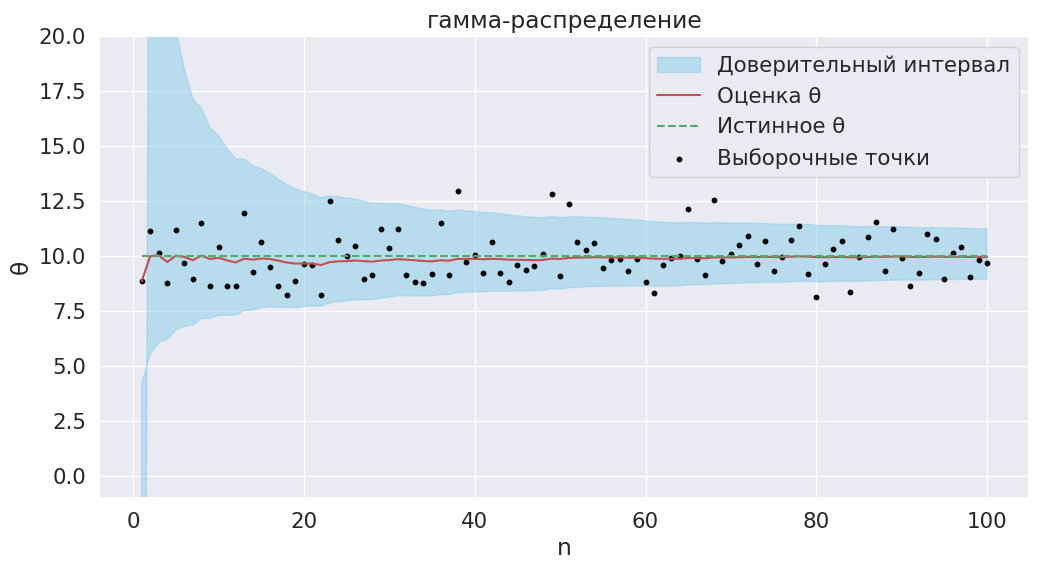

In [234]:
theta, lambd = 10, 3
alpha = 0.95
n = 100
sample = (sps.gamma.rvs(theta, size=n) - 10) / 3 + 10

times = np.arange(1, n + 1)
estimates = np.cumsum(sample) / times

B1 = sps.norm.ppf((1 - alpha) / 2)
B2 = sps.norm.ppf((alpha + 1) / 2)
lower_bound = lambd * estimates / (np.sqrt(lambd / times) * B2 + lambd)
upper_bound = lambd * estimates / (np.sqrt(lambd / times) * B1 + lambd)
draw_confidence_interval(
    n_values, estimates, lower_bound, upper_bound, theta, sample,
    'гамма-распределение', -1, 20
)

In [236]:
from scipy.stats import gamma

lambd = 3
for _ in range(num_simulations):
    sample = gamma.rvs(a=lambd, scale=theta, size=n)
    estimate = np.mean(sample) * lambd
    lower_bound = (lambd * estimate) / (np.sqrt(lambd / n) * B2 + lambd)
    upper_bound = (lambd * estimate) / (np.sqrt(lambd / n) * B1 + lambd)
    if lower_bound <= theta <= upper_bound:
        coverage_count += 1

coverage_probability = coverage_count / num_simulations
print(f'Доля попаданий θ в доверительный интервал: {coverage_probability:.4f}')

Доля попаданий θ в доверительный интервал: 0.9570


Сделайте вывод о том, насколько точен доверительный интервал в каждом случае? Насколько он широк? А что от него ожидается: быть шире или быть уже? От каких свойств распределения зависит ширина?

Вывод:
во всех распределениях доля попадания тета в доверительный интервал оказалась около 0.95. это говорит о том, что интервал мы построили корректно. Красивее всего себя ведут точные доверительные интервалы (это первые два): они очень быстро сужаются. Остальные же два интервала сужаются постепенно, ведь они асимптотические, но при большом размере выборки все интервалы покажут себя хорошо.

вообще говоря можно сделать некоторые выводы-закономерности:


1.   С увеличением объема выборки доверительный интервал сужается
2.   Чем больше дисперсия или разброс данных, тем шире доверительный интервал (но вообще говоря странно и удивительно, что так хорошо получилось отработать с интервалом для Коши)
3.   Использование разных методов построения интервалов может влиять на их ширину. Это подтверждается тем, что при использовании точных ДИ, мы получили графики тоньше, чем для АДИ

ну и почти очевидно, что чем больше уровень доверия, тем шире интервал, ведь мы хотим засунуть в интервал больше значений выборки





### Задача 4.

Точный доверительный интервал в условиях войны с чудовищами консульта строить нет ни времени, ни желания. Зато у нас есть целых два кандидата на его место: маги с востока предлагают использовать асимптотический доверительный интервал, как завещал их философ Айенсис, а маги с запада --- бутстрепный, как написано в их священных текстах. А какой лучше?

В этой задаче мы построим точный, асимптотический и бутстрепный доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

на семинаре мы считали значение точного доверительно интервала уровня 1-а. напишу эту формулу (в вычислениях, конечно, это учту)
$$
\overline{X} \pm t_{1-\frac{α}{2}, n-1} * \frac{\hat{s}}{\sqrt{n}}, \text{где } \hat{s} = \sqrt{\frac{1}{n-1}Σ_{i-1}^n(X_i - \overline{X})^2)}
$$
используемый здесь квантиль - квантиль распределения Стьюдента с н-1 степень свободы

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$

тут формула будет такой же. единственное отличие в том, что используем мы квантили не стьюдента,а нормального распределения:
$$
\overline{X} \pm z_{1-\frac{α}{2}} * \frac{\hat{s}}{\sqrt{n}}
$$
* бутстрепного доверительного итервала уровня доверия $\alpha$ для $a$

Сгенерируем много бутстрепных выборок (1000), используя случайное выбирание с возвращением, высчитать на них средний икс, найти alpha/2 и (1-alpa)/2 квантили. ответом будет этот интервал


Для $n=30, \,a = 0$ постройте __на одном графике__ все три доверительных интервала, а также отметьте линией истинное значение $a$.

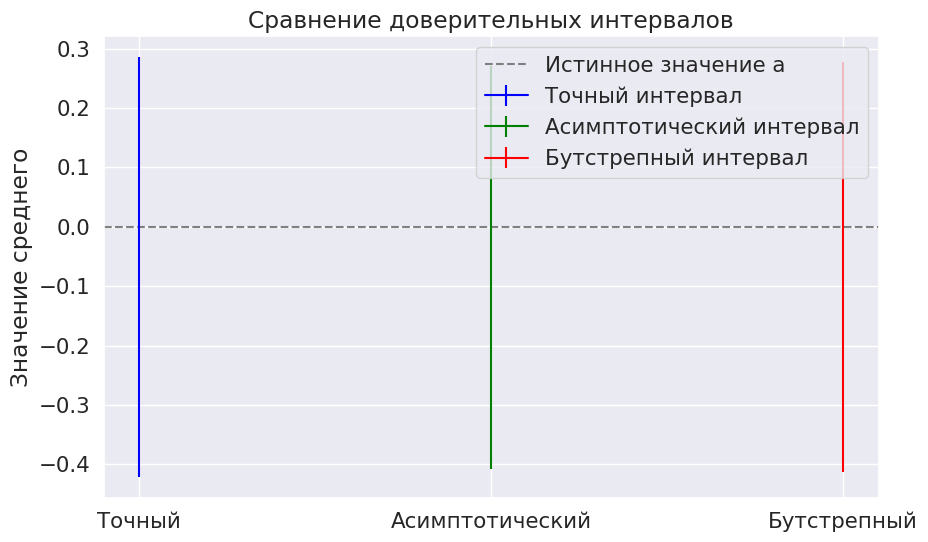

In [17]:
import scipy.stats as stats
n = 30
a = 0
sigma = 1
X = np.random.normal(loc=a, scale=sigma, size=n)
X_bar = np.mean(X)
s_hat = np.std(X, ddof=1)
alpha = 0.05
df = n-1
t_crit = stats.t.ppf(1 - alpha/2, df)
# считаем ТДИ
ci_exact_lower = X_bar - t_crit * s_hat / np.sqrt(n)
ci_exact_upper = X_bar + t_crit * s_hat / np.sqrt(n)
# считаем АДИ
z_crit = stats.norm.ppf(1 - alpha/2)
ci_asymp_lower = X_bar - z_crit * s_hat / np.sqrt(n)
ci_asymp_upper = X_bar + z_crit * s_hat / np.sqrt(n)
# бутстрепный:
B = 1000
bootstrap_means = np.empty(B)

for i in range(B):
    X_bootstrap = np.random.choice(X, size=n, replace=True)
    bootstrap_means[i] = np.mean(X_bootstrap)

ci_bootstrap_lower = np.percentile(bootstrap_means, 100 * alpha/2)
ci_bootstrap_upper = np.percentile(bootstrap_means, 100 * (1 - alpha/2))
# рисуем
plt.figure(figsize=(10, 6))
plt.axhline(y=a, color='grey', linestyle='--', label='Истинное значение a')
plt.errorbar(x=1, y=X_bar, yerr=[[X_bar - ci_exact_lower], [ci_exact_upper - X_bar]],
             color='blue', label='Точный интервал')
plt.errorbar(x=2, y=X_bar, yerr=[[X_bar - ci_asymp_lower], [ci_asymp_upper - X_bar]],
             color='green', label='Асимптотический интервал')
plt.errorbar(x=3, y=X_bar, yerr=[[X_bar - ci_bootstrap_lower], [ci_bootstrap_upper - X_bar]],
             color='red', label='Бутстрепный интервал')

plt.xticks([1, 2, 3], ['Точный', 'Асимптотический', 'Бутстрепный'])
plt.ylabel('Значение среднего')
plt.title('Сравнение доверительных интервалов')
plt.legend()
plt.grid(True)
plt.show()

можно сделать вывод, что все ДИ построены корректно, ведь а находится внутри каждого. их ширина примерно совпадает, но ТДИ самый широкий, ведь учитывает все подводные

Моделированием посчитайте вероятность того, что истинное значение параметра попадёт в интервал. В каком случае оно ближе к теоретическому (среди двух неточных интервалов)?

In [18]:
N = 1000
coverage_exact = 0
coverage_asymp = 0
coverage_bootstrap = 0

for _ in range(N):
    X_sim = np.random.normal(loc=a, scale=sigma, size=n)
    X_bar_sim = np.mean(X_sim)
    s_hat_sim = np.std(X_sim, ddof=1)

    #ТДИ
    t_crit_sim = stats.t.ppf(1 - alpha/2, df)
    ci_exact_lower_sim = X_bar_sim - t_crit_sim * s_hat_sim / np.sqrt(n)
    ci_exact_upper_sim = X_bar_sim + t_crit_sim * s_hat_sim / np.sqrt(n)
    if ci_exact_lower_sim <= a <= ci_exact_upper_sim:
        coverage_exact += 1

    #АДИ
    ci_asymp_lower_sim = X_bar_sim - z_crit * s_hat_sim / np.sqrt(n)
    ci_asymp_upper_sim = X_bar_sim + z_crit * s_hat_sim / np.sqrt(n)
    if ci_asymp_lower_sim <= a <= ci_asymp_upper_sim:
        coverage_asymp += 1

    #БДИ
    bootstrap_means_sim = np.empty(B)
    for i in range(B):
        X_bootstrap_sim = np.random.choice(X_sim, size=n, replace=True)
        bootstrap_means_sim[i] = np.mean(X_bootstrap_sim)
    ci_bootstrap_lower_sim = np.percentile(bootstrap_means_sim, 100 * alpha/2)
    ci_bootstrap_upper_sim = np.percentile(bootstrap_means_sim, 100 * (1 - alpha/2))
    if ci_bootstrap_lower_sim <= a <= ci_bootstrap_upper_sim:
        coverage_bootstrap += 1

coverage_exact /= N
coverage_asymp /= N
coverage_bootstrap /= N

print(f"ТДИ: {coverage_exact * 100:.2f}%")
print(f"АДИ: {coverage_asymp * 100:.2f}%")
print(f"БДИ: {coverage_bootstrap * 100:.2f}%")

ТДИ: 94.80%
АДИ: 93.90%
БДИ: 92.70%


Сделайте вывод о том, когда какой интервал использовать и как их использовать, чтобы получить хороший результат.

Вывод:
если размеры выборки маленькие, то лучше всего использовать ТДИ. Если она обладает какими-то выбросами или тяжелыми хвостами, то БДИ. А вот если размеры выборка большая, то лучше использовать АДИ ведь, как сказано в начале, дело будем иметь с нормальным распределением




## Задача 5

И снова, реальные данные.

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [ ]:
!gdown https://drive.google.com/file/d/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-

Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [40]:
!unzip "/content/city_day.csv.zip" -d "/content/"

Archive:  /content/city_day.csv.zip
  inflating: /content/city_day.csv   


In [41]:
df = pd.read_csv('city_day.csv', usecols=['City', 'Date', 'AQI'], parse_dates=['Date'])
print("БЫЛО:")
print(df.head(10))
df.dropna(subset=['AQI'], inplace=True)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
start_date = pd.to_datetime('2018-07-01')
df = df[(df['Date'] >= start_date) & (df['City'].isin(['Mumbai', 'Kolkata']))]
print("------------------------")
print("СТАЛО:")
df.head(10)

БЫЛО:
        City       Date  AQI
0  Ahmedabad 2015-01-01  NaN
1  Ahmedabad 2015-01-02  NaN
2  Ahmedabad 2015-01-03  NaN
3  Ahmedabad 2015-01-04  NaN
4  Ahmedabad 2015-01-05  NaN
5  Ahmedabad 2015-01-06  NaN
6  Ahmedabad 2015-01-07  NaN
7  Ahmedabad 2015-01-08  NaN
8  Ahmedabad 2015-01-09  NaN
9  Ahmedabad 2015-01-10  NaN
------------------------
СТАЛО:


City       Date   AQI  Month  Year
19114  Kolkata 2018-07-01  58.0      7  2018
19115  Kolkata 2018-07-02  62.0      7  2018
19116  Kolkata 2018-07-03  50.0      7  2018
19117  Kolkata 2018-07-04  58.0      7  2018
19118  Kolkata 2018-07-05  57.0      7  2018
19119  Kolkata 2018-07-06  77.0      7  2018
19120  Kolkata 2018-07-07  65.0      7  2018
19121  Kolkata 2018-07-08  36.0      7  2018
19122  Kolkata 2018-07-09  36.0      7  2018
19123  Kolkata 2018-07-10  56.0      7  2018

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

In [42]:
def bootstraping(sample, alpha, size):
  samples = np.random.choice(sample, size=(size, len(sample)), replace=True)
  mean = sample.mean()
  means = samples.mean(axis=-1)
  lower, upper = np.quantile(means, [(1 - alpha) / 2, (1 + alpha) / 2])
  return lower, upper, mean

Для каждого месяца с июля 2018 по июнь 2020 включительно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [43]:
grouped = df.groupby(['Year', 'Month'])
results = pd.DataFrame(index=grouped.indices, columns=['AQI_mean', 'AQI_lower', 'AQI_upper'])
results.head(10)

AQI_mean AQI_lower AQI_upper
2018 7       NaN       NaN       NaN
     8       NaN       NaN       NaN
     9       NaN       NaN       NaN
     10      NaN       NaN       NaN
     11      NaN       NaN       NaN
     12      NaN       NaN       NaN
2019 1       NaN       NaN       NaN
     2       NaN       NaN       NaN
     3       NaN       NaN       NaN
     4       NaN       NaN       NaN

In [44]:
N = 1000
alpha = 0.95
for index, month_data in grouped:
    sample = month_data['AQI']
    lower, upper, mean = bootstraping(sample, alpha, N)
    results.loc[index] = [mean , lower, upper]

results

AQI_mean   AQI_lower   AQI_upper
2018 7         60.1    56.09875     63.8675
     8    72.564516   70.354839   75.209677
     9        85.15       80.85    89.76875
     10   144.54386  130.964912  158.812281
     11  224.142857  197.266071  248.309821
     12  245.629032   218.83871  273.589113
2019 1   263.177419  234.852016  291.887903
     2   207.946429  185.320536  230.607589
     3   140.629032  130.918952  150.471371
     4    92.433333   87.665833   98.117083
     5    88.209677   83.806048   92.097581
     6    71.816667    68.16625     75.3675
     7    63.693548   60.483468   67.306452
     8    58.887097    56.06371   61.840726
     9    52.216667   49.032917   55.533333
     10  110.129032   98.657661  124.087903
     11  170.583333  155.299167  186.134583
     12  195.612903  182.806048  207.827016
2020 1   192.790323  178.079435  207.308468
     2   178.465517  168.378017  189.128017
     3   113.741935  104.870565  123.082258
     4        72.35   67.733333      76.985
     5    58.548387   55.079435   62.420161
     6    49.883333        47.8   51.935417
     7         49.0        45.0        53.0

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [45]:
def bootstraping_for_city(data, city_name, alpha, size):
  filtered_data = data[data['City'] == city_name]
  grouped = filtered_data.groupby(['Year', 'Month'])
  results = pd.DataFrame(index=grouped.indices, columns=['AQI_mean', 'AQI_lower', 'AQI_upper'], dtype=float)
  for index, month_data in grouped:
        sample = month_data['AQI']
        lower, upper, mean = bootstraping(sample, alpha, size)
        results.loc[index] = [mean, lower, upper]
  return results

In [46]:
Mumbai, Kolkata = bootstraping_for_city(df, 'Mumbai', alpha, N), bootstraping_for_city(df, 'Kolkata', alpha, N)
Mumbai.head(10)

AQI_mean   AQI_lower   AQI_upper
2018 7    69.172414   65.793103   72.621552
     8    74.806452   70.967742   79.097581
     9    87.233333   81.399167   93.434167
     10  122.461538  117.037500  128.425962
     11  155.461538  139.112500  175.193269
     12  153.000000  144.322581  162.516935
2019 1   165.516129  152.966935  178.195161
     2   149.821429  137.749107  161.574107
     3   123.483871  114.547581  132.871774
     4    98.066667   95.333333  101.466667

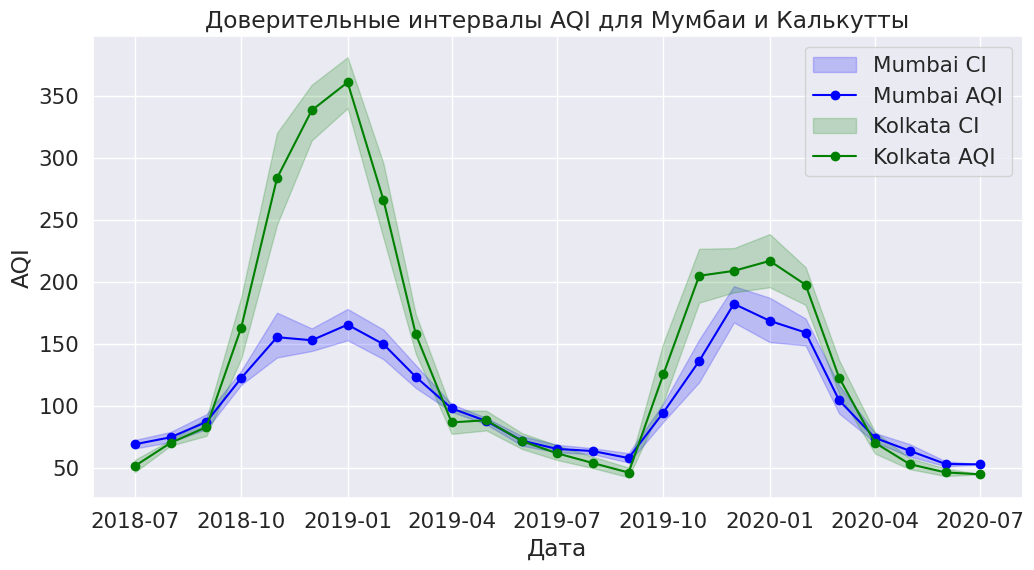

In [47]:
Mumbai.index = pd.to_datetime(Mumbai.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))
Kolkata.index = pd.to_datetime(Kolkata.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))
#две строки выше мне пришлось добавить чтобы преобразовать наши даты в числовой формат, ведь иначе колаб ругался и не строил график

def plot_city_with_intervals(data, city_name, color):
    plt.fill_between(data.index, data['AQI_lower'], data['AQI_upper'], color=color, alpha=0.2, label=f'{city_name} CI')
    plt.plot(data.index, data['AQI_mean'], color=color, marker='o', label=f'{city_name} AQI')

plt.figure(figsize=(12, 6))
plot_city_with_intervals(Mumbai, 'Mumbai', 'blue')
plot_city_with_intervals(Kolkata, 'Kolkata', 'green')

plt.xlabel('Дата')
plt.ylabel('AQI')
plt.title('Доверительные интервалы AQI для Мумбаи и Калькутты')
plt.legend()
plt.grid(True)
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Калькутта имеет более высокие значения AQI по сравнению с Мумбаи, что свидетельствует о более высоком уровне загрязнения воздуха в Калькутте.

В зимние месяцы наблюдается повышение уровня загрязнения воздуха.

начиная с 2020 индекс меньше. это связано скорее всего с тем, что из-за коронавируса были какие-то ограничения

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

То же самое сделайте для Калькутты.

In [48]:
def month_and_year_and_city(data, city, year, month):
    return data[(data['City'] == city) & (data['Year'] == year) & (data['Month'] == month)]

In [49]:
m_2019_04 = month_and_year_and_city(df, 'Mumbai', 2019, 4)
m_2020_04 = month_and_year_and_city(df, 'Mumbai', 2020, 4)
k_2019_04 = month_and_year_and_city(df, 'Kolkata', 2019, 4)
k_2020_04 = month_and_year_and_city(df, 'Kolkata', 2020, 4)
m_2019_04.head(10)

City       Date    AQI  Month  Year
23406  Mumbai 2019-04-01   90.0      4  2019
23407  Mumbai 2019-04-02   86.0      4  2019
23408  Mumbai 2019-04-03  138.0      4  2019
23409  Mumbai 2019-04-04   94.0      4  2019
23410  Mumbai 2019-04-05   94.0      4  2019
23411  Mumbai 2019-04-06   95.0      4  2019
23412  Mumbai 2019-04-07   98.0      4  2019
23413  Mumbai 2019-04-08   95.0      4  2019
23414  Mumbai 2019-04-09   93.0      4  2019
23415  Mumbai 2019-04-10   94.0      4  2019

In [50]:
def bootstrap_comparison(ax, city_name, data1, data2, color):
    sample1 = data1['AQI']
    sample2 = data2['AQI']
    lower1, upper1, mean1 = bootstraping(sample1, alpha, N)
    lower2, upper2, mean2 = bootstraping(sample2, alpha, N)
    ax.hlines(y=1.5, xmin=lower1, xmax=upper1, color=color, linewidth=10, alpha=0.5)
    ax.hlines(y=2.0, xmin=lower2, xmax=upper2, color=color, linewidth=10, alpha=0.5, label=f'Интервалы для {city_name}')
    ax.scatter(mean1, 1.5, color='black', marker='o', label=f'Среднее {city_name} 2019')
    ax.scatter(mean2, 2.0, color='black', marker='*', label=f'Среднее {city_name} 2020')
    ax.scatter(sample1, np.full_like(sample1, 1.5), color=color, alpha=0.3)
    ax.scatter(sample2, np.full_like(sample2, 2.0), color = color, marker='*',  alpha=0.3)

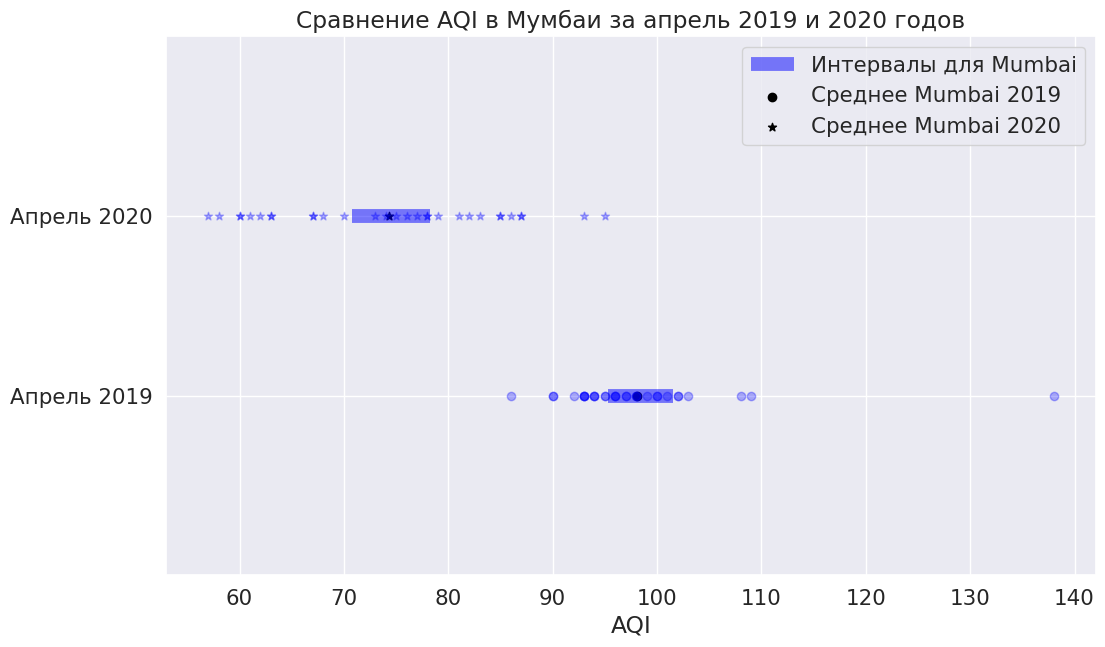

In [51]:
fig, ax = plt.subplots(figsize=(12, 7))
bootstrap_comparison(ax, 'Mumbai', m_2019_04, m_2020_04, 'blue')
ax.set_yticks([1.5, 2.0])
ax.set_yticklabels(['Апрель 2019', 'Апрель 2020'])
ax.set_xlabel('AQI')
ax.set_ylim([1, 2.5])
ax.legend()
ax.grid(True)
plt.title('Сравнение AQI в Мумбаи за апрель 2019 и 2020 годов')
plt.show()

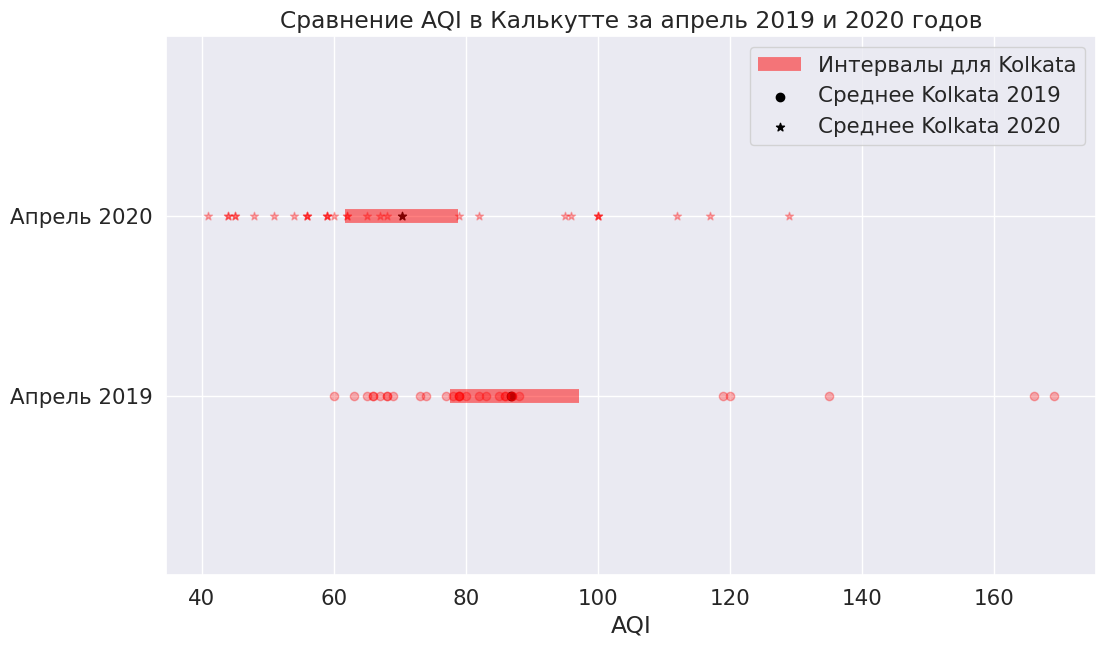

In [52]:
fig, ax = plt.subplots(figsize=(12, 7))
bootstrap_comparison(ax, 'Kolkata', k_2019_04, k_2020_04, 'red')
ax.set_yticks([1.5, 2.0])
ax.set_yticklabels(['Апрель 2019', 'Апрель 2020'])
ax.set_xlabel('AQI')
ax.set_ylim([1, 2.5])
ax.legend()
ax.grid(True)
plt.title('Сравнение AQI в Калькутте за апрель 2019 и 2020 годов')
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев? Какие прикладные выводы о загрязнении воздуха можно сделать из Ваших результатов?

В обоих городах наблюдается значительное снижение среднего значения AQI в апреле 2020 года по сравнению с апрелем 2019 года.

Доверительные интервалы для апреля 2019 и апреля 2020 годов не пересекаются, что указывает на статистически значимое различие в среднем AQI между этими периодами. Я всё еще думаю, что это связано с пандемией, ведь по сравнению с 19 годом, в 20 уже меньше ходило общественного транспорта и тд